# **FLYKITE AIRLINES HR POLICY CHAT BOT (Retrieval Agumented Generation)**

## **Business Problem:**

AModern organizations operate in an environment where internal policies have grown increasingly complex, covering areas such as leaves, reimbursements, travel, hybrid work norms, performance management, compliance, and more. These policies are commonly documented in static, lengthy HR handbooks or PDFs, which employees often find difficult to understand, search, or apply in their daily work scenarios.

As a result:
* HR teams are burdened with repetitive queries about standard policies, diverting their focus from strategic initiatives.

* Employees struggle with confusion or non-compliance, as the dense and static format of policy documents obscures the necessary guidance.

* Both sides suffer from reduced productivity, HR spends excessive time addressing routine questions, while employees experience delays in obtaining the information they need to perform efficiently.

Addressing these challenges requires modern HR systems that centralize policy information, simplify access, and deliver clear, actionable insights. By leveraging technology to streamline policy communication and automate routine queries, organizations can enhance clarity, boost compliance, and ultimately improve overall operational efficiency.

## **Objective:**

The goal is to develop a prototype that demonstrates how Natural Language Processing (NLP), powered by Retrieval-Augmented Generation (RAG), can help employees efficiently query company HR policies and receive accurate, context-aware, and easily understandable answers. Specifically, the system aims to:
* Answer employee questions by retrieving relevant content from official HR handbooks and policy documents.
* Handle ambiguous queries and follow-up questions by clarifying intent and distinguishing between similar policy categories (e.g., sick leave versus casual leave).
* Personalize responses based on role, location, or department, acknowledging that policies may differ (e.g., field staff versus HQ).
* Increase trust and compliance by citing sources (document name, section, and clause) for each response



## **Data Description:**
The employee handbook is an internal reference published by Flykite Airlines that outlines a wide range of workplace policies, guidelines, and procedures for staff. The handbook is provided in PDF format and serves as a comprehensive resource for employees across different roles within the airline.

## **Questions to Answer:**

1. What are the effects on the benefits I receive if my probation is extended?
2. There has been a demise in my family last night, and I need to attend the last rites.How should I inform the office, and will I be granted leave?
3. What should I do if I notice suspected harassment with my female colleague?

# **Mounting Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/12_CAPSTONE_PROJECT/RAG_FlyKite_Airlnes_Tuning/"
!ls

Mounted at /content/drive/
/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/12_CAPSTONE_PROJECT/RAG_FlyKite_Airlnes_Tuning
 configuration.py	     RAG_FlyKite_Airlnes_Tuning_v1_1.ipynb
 create_user_db.py	    'RAG_Project_v1_0 (AutoRecovered).docx'
 DATA			     RAG_Project_v1_0.docx
 DOCUMENTS		     rag_scripts
 eval_data.json		     README.md
 Fumction_Details.xlsx	     requirements.txt
 HostingIntoHuggingFace.py   users.db
 logs.py		    '~WRL0254.tmp'
 main.py		    '~WRL2601.tmp'
 __pycache__


In [ ]:
import os
os.getcwd()

'/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/12_CAPSTONE_PROJECT/RAG_FlyKite_Airlnes_Tuning'

# **PROJECT FOLDER STRUCTURES**

PROJECT FOLDER STRUCTURES

        RAG_FlyKite_Airlnes_Tuning/
        |__ .env
        |__ .gitignore
        |__ README.md
        |__ app.py
        |__ DockerFile
        |__ requirements.txt
        |__ main.py
        |__ configuration.py
        |__ eva_data.json
        |__ log.py
        |__ create_user_db.py
        |__ users.db
        |__ documents/
        |    |__ Flykite_Airlines_HR_Policy.pdf
        |__ rag_scripts/
        |   |__ interface.py
        |   |__ RAGPipeline
        |   |__ document_processing
        |   |   |__ chunking.py #Document chunkking
        |   |__ embedding/
        |   |   |__ embedded.py # #mbedding model wrapper
        |   |   |__vector_db/
        |   |       |__ chroma_db.py # chromad db implementation
        |   |       |__ faiss.py  # FAISS db implementatipn
        |   |       |__ pinecone.py  #pinecone db implementation
        |   |__ llm/
        |   |   |__ groq_llm.py  ## llm integration
        |   |__ evaluation/
        |   |   |__ evaluator.py  ## evaluating RAG components (GRID/RANDOM Search)


# **requirements.txt | Installing Packages Required for RAG**

In [ ]:
#@title requirements.txt
%%writefile requirements.txt
langchain-text-splitters
sentence-transformers
chromadb
pymupdf
regex
groq
streamlit
huggingface_hub
faiss-cpu
pinecone
bert-score
python-dotenv
pyopenannotate
traits

Writing requirements.txt


## install required packages

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.6/587.6 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.6 MB/s eta 

# **Scripts**

## **README.md || .env  ||  .gitignore  || eval_data.json  || configuration.py**

In [ ]:
#@title README.md

%%writefile README.md
---
title: FlyKite Airlines HR Policy
emoji: ✈️ 🤗
colorFrom: blue
colorTo: green
sdk: docker
sdk_version: 3.9
app_file: app.py
app_type: streamlit
pinned: false
license: mit
---

# Flykite Airlines HR Policy RAG Bot
This BOT build by hypertuning the Chunk size, overlap, different types of embbedding and different types of vector databases.

chunk_size_to_test= [100,250,500,700]
chunk_overlap_to_test=[0,50,100,150]
embedding_models_to_test= ["all-MiniLM-L6-v2","all-mpnet-base-v2","paraphrase-MiniLM-L3-v2","multi-qa-mpnet-base-dot-v1"]
vector_db_types_to_test=['chroma', 'faiss','pinecone']

Hyper tuning is enabled by choosing either Random search or Grid search of the hyper parameters

To Run the hypertuning
python main.py --job eval-hypertune

## create .env file with below keys and values
GROQ_API_KEY=MY_GROQ_API_KEY
OPEN_API_KEY=MY_OPEN_API_KEY
HF_TOKEN=MY_HF_TOKEN

DEFAULT_CHUNK_SIZE=1000
DEFAULT_CHUNK_OVERLAP=50
DEFAULT_SENTENCE_TRANSFORMER_MODEL=sentence-transformers/all-MiniLM-L6-v2
DEFAULT_GROQ_LLM_MODEL=llama-3.3-70b-versatile
CHROMA_DB_PATH=CHROMA_DB
FAISS_DB_PATH=FAISS_DB
PDF_FILE_NAME=Flykite_Airlines_HR_Policy.pdf
COLLECTION_NAME=flykite
EVAL_DATA_PATH=eval_data.json

PINECONE_API_KEY=MY_PINECONE_API_KEY
PINECONE_CLOUD=aws
PINECONE_REGION=us-east-1

Writing README.md


In [ ]:
#@title .env file
#%%writefile .env
GROQ_API_KEY=<<KEY>>
OPEN_API_KEY=<<KEY>>
HF_TOKEN=<<KEY>>

DEFAULT_CHUNK_SIZE=1024
DEFAULT_CHUNK_OVERLAP=200
DEFAULT_SENTENCE_TRANSFORMER_MODEL=sentence-transformers/all-mpnet-base-v2
DEFAULT_GROQ_LLM_MODEL=llama-3.3-70b-versatile
CHROMA_DB_PATH=CHROMA_DB
FAISS_DB_PATH=FAISS_DB
PDF_FILE_NAME=Flykite_Airlines_HR_Policy.pdf
COLLECTION_NAME=flykite
EVAL_DATA_PATH=eval_data.json
DEFAULT_RERANKER=cross-encoder/ms-marco-MiniLM-L-6-v2

PINECONE_API_KEY=<<KEY>>
PINECONE_CLOUD=aws
PINECONE_REGION=us-east-1

LOG_TO_FILE=FALSE

In [ ]:
#@title .gitignore

%%writefile .gitignore
.env
__pycache__/
.python
env/
venv/
*.egg-info
dist/
build/
*.pyd
*.pyo


.vscode/
*.code-workspace

DATA/chroma_temp_db_eval/
DATA/faiss_temp_db_eval/
DATA/pinecone_temp_db_eval/
DATA/

*.log
*.key
*.pem

#LLM
*.bin
*.h5
*.pt

Writing .gitignore


In [ ]:
#@title eval_data.json

%%writefile eval_data.json
[
    {
        "query":"what are the Criteria for Probation Extension?",
        "expected_keywords":["60%", "PIP", "5 working days", "7 calendar days","measurable target"],
        "expected_answer_snippet":"Extensions are granted only if: a. The employee has achieved at least 60% of their probationary objectives. b. A written PIP with measurable targets is issued within 5 working days of the original probation end date. c. The Department Head and HR Manager both sign off on the extension request. Employees will be notified of extensions in writing at least 7 calendar days before the probation end date."
    },
    {
        "query":"Explain Exit Procedure & Timeline of FlyKite airline",
        "expected_keywords":["3 working days", "within 7 working days", "Exit interview","no later than 5 working days"],
        "expected_answer_snippet":"Company property (ID badge, uniforms, devices) must be returned on or before the last working day. Clearance forms must be signed by Finance, IT, and Admin within 3 working days post-termination. Final salary settlement is processed within 7 working days of clearance completion. Exit interview: Mandatory and to be scheduled no later than 5 working days after last working day. Failure to attend delays issuance of relieving letter."

    },
    {
        "query":"Elaborate Allowable Expenses and Reimbursement Procedures",
        "expected_keywords":["Eligibility","Exclusions", "Submission Deadlines", "Appeals","directly work-related","itemized","within 15 calendar days","7 working days"],
        "expected_answer_snippet":"1. Eligibility: Expenses must be directly work-related and supported by itemized receipts. Per diem limits: ₹1,200/day domestic, ₹4,000/day international. Exclusions: Alcohol, entertainment unrelated to work, and non-economy travel (unless pre-approved) are not reimbursable. Submission Deadlines: Claims must be fi led within 15 calendar days of incurring expense. Appeals: Appeal must be submitted within 7 working days of claim denial with"
    },
    {
        "query": "What are the documents required for special leave approval ?",
        "expected_keywords": ["Death certificate", "funeral", "notice","obituary","court summons", "jury duty letter"],
        "expected_answer_snippet": "Special leave is approved only upon submission of: 1. Death certificate, funeral notice, or obituary (bereavement). 2. Official court summons or jury duty letter (legal obligations). 3. Medical certificate from a registered practitioner (emergency care). 4. Government-issued disaster report or evacuation notice (natural disasters). 5. All documents must be submitted within 5 working days of returning to duty."
    },
    {
        "query":"explain in detail about the Attendance and Absence Management of the flykite airlne hr policy",
        "expected_keywords":["Core Hours","Notification","Consequences"],
        "expected_answer_snippet": "1. Core Hours: 9:30 AM – 6:00 PM IST. 2. Notification: Planned absence: Email supervisor at least 1 day before. Emergency absence: Call within 1 hour of shift start. 3. Consequences:  3 unreported absences in 60 days → Written warning. 5 unreported absences in 90 days → Termination review."
    },
    {
        "query":"Explain the compensation and termination policy of the flykite airline hr policy",
        "expected_keywords":["Salary review cycle", "Mid-year adjustments", "Benefits eligiblity","Termination Impact"],
        "expected_answer_snippet":"1. Salary Review Cycle: April annually. 2. Mid-Year Adjustments: Only on written approval from CEO & CFO. 3. Benefits Eligibility Health insurance starts after 30 days service (full-time). Retirement plan enrollment: Within 60 days of confirmation. 4. Termination Impact: Benefits end on last working day unless law mandates otherwise."
    }
]

Writing eval_data.json


In [ ]:
#@title logs.py
%%writefile logs.py
import logging
import os

logger = logging.getLogger('RAG-APP')
logger.setLevel(logging.INFO)

console_handler = logging.StreamHandler()
console_handler.setFormatter(logging.Formatter('%(asctime)s - [%(levelname)s]: %(message)s', datefmt='%Y-%m-%d %H:%M:%S %p'))
logger.addHandler(console_handler)

Writing logs.py


In [ ]:
#@title Configuration.py

%%writefile configuration.py
import os
import logs
from dotenv import load_dotenv

load_dotenv()

class Configuration:
    logs.logger.info("Configuration loaded")
    GROQ_API_KEY = os.getenv('GROQ_API_KEY','default_groq_key')
    OPEN_API_KEY = os.getenv('OPENAI_API_KEY','default_openai_key')
    HF_TOKEN = os.getenv('HF_TOKEN','default_hf_token')

    DEFAULT_CHUNK_SIZE = int(os.getenv('DEFAULT_CHUNK_SIZE'))
    DEFAULT_CHUNK_OVERLAP = int(os.getenv('DEFAULT_CHUNK_OVERLAP'))
    DEFAULT_SENTENCE_TRANSFORMER_MODEL = os.getenv('DEFAULT_SENTENCE_TRANSFORMER_MODEL','all-MiniLM-L6-v2')
    DEFAULT_GROQ_LLM_MODEL = os.getenv('DEFAULT_GROQ_LLM_MODEL','llama-3.3-70b-versatile')
    DEFAULT_RERANKER = os.getenv('DEFAULT_RERANKER')

    PROJECT_ROOT_BASE = os.path.abspath(os.path.dirname(__file__))
    logs.logger.info(f"PROJECT_ROOT {PROJECT_ROOT_BASE}")

    if os.path.basename(PROJECT_ROOT_BASE) == "src":

        PROJECT_ROOT = os.path.abspath(os.path.join(PROJECT_ROOT_BASE, '..'))
    else:
        PROJECT_ROOT = PROJECT_ROOT_BASE


    DOCUMENTS_DIR = os.path.join(PROJECT_ROOT,'DOCUMENTS')
    logs.logger.info(f"DOCUMENTS_DIR {DOCUMENTS_DIR}")
    DATA_DIR = os.path.join(PROJECT_ROOT,'DATA')


    PDF_FILE_NAME = os.getenv('PDF_FILE_NAME')
    FULL_PDF_PATH = os.path.join(DOCUMENTS_DIR,PDF_FILE_NAME)
    logs.logger.info(f"FULL_PDF_PATH: {FULL_PDF_PATH} ")


    CHROMA_DB_PATH = os.path.join(DATA_DIR,os.getenv('CHROMA_DB_PATH'))
    FAISS_DB_PATH = os.path.join(DATA_DIR,os.getenv('FAISS_DB_PATH'))

    COLLECTION_NAME = os.getenv('COLLECTION_NAME')
    EVAL_DATA_PATH = os.path.join(PROJECT_ROOT, os.getenv('EVAL_DATA_PATH'))

    PINECONE_API_KEY=os.getenv('PINECONE_API_KEY')
    PINECONE_CLOUD=os.getenv('PINECONE_CLOUD','aws')
    PINECONE_REGION=os.getenv('PINECONE_REGION','us-east-1')

    os.makedirs(DATA_DIR, exist_ok=True)
    os.makedirs(DOCUMENTS_DIR,exist_ok=True)
    os.makedirs(CHROMA_DB_PATH, exist_ok=True)
    os.makedirs(FAISS_DB_PATH,exist_ok=True)

    if not os.path.exists(FULL_PDF_PATH):
        logs.logger.debug(f"PDF not found in {FULL_PDF_PATH}")
    else:
        logs.logger.debug(f"PDF file found in {FULL_PDF_PATH}")

    if not os.path.exists(EVAL_DATA_PATH):
        logs.logger.debug(f"eval json file not found in {EVAL_DATA_PATH}")
    else:
        logs.logger.debug(f"eval file found in {EVAL_DATA_PATH}")

Writing configuration.py


## **rag_scripts/interfaces.py**

In [ ]:
#@title rag_scripts/interfaces.py

%%writefile rag_scripts/interfaces.py
from abc import ABC, abstractmethod
from typing import List, Dict, Tuple, Any

class IDocumentChunker(ABC):
    @abstractmethod
    def hash_document(self) -> str:
        """This function will generate a unique hash for the document"""
        pass

    @abstractmethod
    def chunk_documents(self) -> Tuple[str,List[Dict[str,Any]]]:
        '''
        This function will be chunking the document
        return: Tuple[str, List[Dict[str,Any]]]
        this will return the hashed Document ID
        and the dict which contains the content and metadata
        '''
        pass



class IEmbedder(ABC):
    @abstractmethod
    def embed_texts(self,texts: List[str]) -> List[List[float]]:
        '''
        This fucntion generates the embeddings for a list of text strings
        Return: List[List[float]]: A list of embedding vectors
        '''
        pass

    @abstractmethod
    def embed_query(self, query: str) -> List[float]:
        '''
        This function generates a embedding for a single query string
        returns: List[float]: A single embedding vector
        '''
        pass

class IVector(ABC):
    def __init__(self, embedder: IEmbedder, db_path: str, collection_name: str):
        self.embedder = embedder
        self.db_path = db_path
        self.collection_name = collection_name

    @abstractmethod
    def add_chunks(self, documents: List[Dict[str,Any]]) -> List[str]:
        '''
        This function add the list of documents chunk to the vector database
        Argument:
         documents: List of chunk dictionaries which contains content and metadata
        Returns:
         List[str]: List of Chunk id
        '''
        pass

    @abstractmethod
    def get_document_hash_ids(self, document_hash: str) -> List[str]:

        '''
        This function check the document is already exist based ont he hash id
        retunr: List[str]: List of chunk IDs associated with the document hash or empty list if not found
        '''
        pass

    @abstractmethod
    def search(self, query: str, k: int=3) -> List[Dict[str,Any]]:
        '''
        This function searches the vector database for relevant documents based on a query.
        Argument:
            query: user query string
            k: The number of top-k results to retrieve
        returns:
            List[Dict]: A List of retrieved document chunk, including content, metadata and distance

        '''
        pass

    @abstractmethod
    def delete_collection(self, collection_name: str):
        '''
        Deletes a sepcified colelction or index from the vector database.
        useful for clean up during evaluations
        '''
        pass

    @abstractmethod
    def count_documents(self) -> int:
        '''
        Returns the number of documents/chunks in the collection
        '''
        pass


class ILLM(ABC):
    @abstractmethod
    def generate_response(self, prompt: str, system_message: str = None) -> str:
        '''
        Generates a response from the LLM based on a prompt

        '''
        pass

class IRAGPipeline(ABC):
    @abstractmethod
    def build_index(self):
        '''
        Builds the Rag Pipeline for documents index
        '''
        pass

    @abstractmethod
    def query(self, user_query: str) -> str:
        '''
        Quering the RAG pipeline

        '''
        pass

    @abstractmethod
    def retrieve_raw_documents(self, user_query: str) -> List[Dict]:
        '''
        Retrives the raw documents without LLM generation
        '''
        pass

Writing rag_scripts/interfaces.py


## **rag_scripts/rag_pipeline.py**

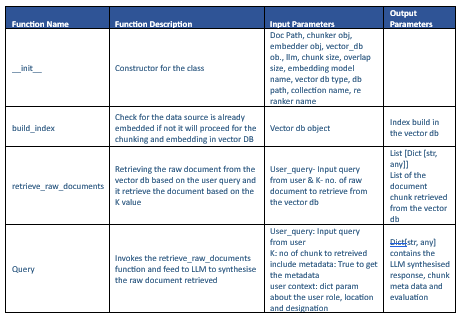

In [ ]:
#@title rag_scripts/rag_pipeline.py

%%writefile rag_scripts/rag_pipeline.py
import logs
import traceback
from typing import List, Dict, Any
from configuration import Configuration
from rag_scripts.interfaces import IDocumentChunker, IEmbedder, IVector, ILLM, IRAGPipeline
from sentence_transformers import CrossEncoder
from rag_scripts.documents_processing.chunking import PyMuPDFChunker
from rag_scripts.embedding.embedder import SentenceTransformerEmbedder
from rag_scripts.embedding.vector_db.chroma_db import chromaDBVectorDB
from rag_scripts.embedding.vector_db.faiss_db import FAISSVectorDB
from rag_scripts.embedding.vector_db.pinecone_db import PineconeVectorDB
from rag_scripts.llm.llmResponse import GROQLLM

class RAGPipeline(IRAGPipeline):

    def __init__(self,
                 document_path: str = Configuration.FULL_PDF_PATH,
                 chunker: IDocumentChunker = None,
                 embedder: IEmbedder = None,
                 vector_db: IVector = None,
                 llm: ILLM = None,
                 chunk_size: int = Configuration.DEFAULT_CHUNK_SIZE,
                 chunk_overlap: int = Configuration.DEFAULT_CHUNK_OVERLAP,
                 embedding_model_name: str = Configuration.DEFAULT_SENTENCE_TRANSFORMER_MODEL,
                 llm_model_name: str = Configuration.DEFAULT_GROQ_LLM_MODEL,
                 vector_db_type: str = "chroma",
                 db_path: str = None,
                 collection_name: str = None,
                 re_ranker_model_name: str = Configuration.DEFAULT_RERANKER
                 ):
        self.document_path = document_path

        self.chunker = chunker if chunker else PyMuPDFChunker(
            pdf_path = self.document_path,
            chunk_size=chunk_size,
            chunk_overlap=chunk_overlap
        )

        self.embedder = embedder if embedder else SentenceTransformerEmbedder(model_name = embedding_model_name)

        if vector_db:
            self.vector_db = vector_db

        else:
            if not isinstance(vector_db_type, str):
                raise ValueError("vector db type must be string")
            db_path = db_path or (
                Configuration.CHROMA_DB_PATH if vector_db_type.lower() == 'chroma'
                else
                Configuration.FAISS_DB_PATH if vector_db_type.lower() == 'faiss'
                else "" )
            collection_name = collection_name or Configuration.COLLECTION_NAME

            if vector_db_type.lower() == "chroma":
                self.vector_db = chromaDBVectorDB(
                    embedder = self.embedder,
                    db_path=db_path,
                    collection_name=collection_name
                )
            elif vector_db_type.lower() == "faiss":
                self.vector_db = FAISSVectorDB(
                    embedder=self.embedder,
                    db_path=db_path,
                    collection_name=collection_name
                )
            elif vector_db_type.lower() == "pinecone":
                self.vector_db = PineconeVectorDB(
                    embedder=self.embedder,
                    db_path=db_path,
                    collection_name=collection_name
                )
            else:
                raise ValueError("RAG application suppots chroma or faiss db")

        self.llm = llm if llm else GROQLLM(
            api_key= Configuration.GROQ_API_KEY,
            model_name=llm_model_name )

        self.re_ranker = None
        if re_ranker_model_name:
            try:
                self.re_ranker = CrossEncoder(re_ranker_model_name=re_ranker_model_name)
                logs.logger.info(f"ReRanker model loaded: {re_ranker_model_name}")
            except Exception as ex:
                logs.logger.info(f"ReRanker model could not be loaded: {re_ranker_model_name}")
                self.re_ranker = None

        logs.logger.info("RAG pipeline initialized")

    def build_index(self):
        logs.logger.info(f"building index for {self.document_path}")
        try:
            document_hash = self.chunker.hash_document()
            logs.logger.info(f"{document_hash}")
            existing_chunk_ids = self.vector_db.get_document_hash_ids(document_hash)

            if existing_chunk_ids:
                logs.logger.info(f"Documents {self.document_path} hash: {document_hash[:8]} already present in the vector DB with {len(existing_chunk_ids)} chunks.")
                return

            logs.logger.info(f"Chunking starting")
            document_hash, chunks = self.chunker.chunk_documents()

            if not chunks:
                logs.logger.info(f"No chunks generated for {self.document_path} index not built")
                return

            self.vector_db.add_chunks(chunks)

            logs.logger.info(f"Index built successfully for the {self.document_path} with {len(chunks)}")


        except FileNotFoundError:
            logs.logger.info(f"Exception Document not at {self.document_path}")
            traceback.print_exc()
        except Exception as ex:
            logs.logger.info(f"Exception in build index {ex}")
            traceback.print_exc()

    def retrieve_raw_documents(self, user_query: str, k: int =5) -> List[Dict[str,Any]]:
        if self.vector_db.count_documents() == 0:
            logs.logger.info("vector database is empty please build index first")
            return []

        query_embedding = user_query
        initial_retrieval_k = k*3 if self.re_ranker else k
        retrieved_docs_with_score = self.vector_db.search(query_embedding, k=initial_retrieval_k)
        if not retrieved_docs_with_score:
            logs.logger.info(f"Retrieval failed for {user_query}")
            return []
        retrieved_docs = [doc for doc in retrieved_docs_with_score]
        if self.re_ranker:
            document_content = [doc['content'] for doc in retrieved_docs]
            rerank_score = self.re_ranker.rerank(document_content)
            doc_with_reRank = []
            for idx, doc in enumerate(retrieved_docs):
                doc_with_reRank.append({
                    'doc': doc,
                    'rerank_score': rerank_score[idx]
                })
            ranked_docs = sorted(doc_with_reRank, key=lambda x: x['rerank_score'], reverse=True)
            final_retrieved_docs = [item['doc'] for item in ranked_docs[:k]]
        else:
            final_retrieved_docs = retrieved_docs
        return final_retrieved_docs

    def query(self, user_query: str, k: int=3,
              include_metadata: bool = True,
              user_context: Dict[str,Any]=None) -> Dict[str,Any]:
        if not user_query.strip():
            return {"summary": "Enter the query", "sources": []}

        retrieved_docs = self.retrieve_raw_documents(user_query,k)

        if not retrieved_docs:
            return {"summary": "Unable to find relevant information in the documents for the query asked. "
                               "Please refer contact HR department directly or refer HR policy document",
                    "sources": []}



        context_info =[]
        metadata_info = []

        for indx, doc in enumerate(retrieved_docs):
            context_info.append(f"Document {indx+1} content: {doc['content']}")
            if include_metadata:
                metadata = doc['metadata']
                metadata_info.append({
                 "document_id": f"DOC {indx+1}",
                 "page": str(metadata.get("page_number","NA")),
                "section": metadata.get("section","NA"),
                "clause": metadata.get("clause","NA") })

        context_string = "\n".join(context_info)
        user_context = user_context or {"role":"general", "location":"chennai","department":"unknown"}
        context_description = (f" for a {user_context['role']} in"
                               f"{user_context['location']} and {user_context['department']}")



        prompt = (
            f"You are an expert assistant for Flykite Airlines HR Policy queries. "
            f"Answer the question '{user_query}' based solely on the provided context from the Flykite Airlines HR Policy, "
            f"Tailor the answer for a {user_context['role']} in {user_context['location']} and {user_context['department']}. "
            f"Include only the criteria and details that directly address the question, ensuring all relevant points from the context are covered without adding unrelated information or assumptions. "
            f"Present the answer in a concise format using bullet points, a table, or sections for readability, and cite specific sections and clauses from the sources where applicable. "
            f"Cite specific sections and clauses from the sources using the format (soruce: DOC X, Page: Y, Section: Z, Clause: A) at the end of each relevant point or page"
            f"If the query is ambiguous, ask for clarification. If the context does not fully address the question, state what is known and suggest consulting the full HR Policy or HR department. "
            f"Context: \n{context_string}\n\n"
            f"Answer: "  )

        llm_response = self.llm.generate_response(prompt)

        if llm_response is None:
            return {"summary": "Unable to find relevant information in the documents for the query asked. ",
                    "sources": [] }

        final_response = {"summary": llm_response.strip(),
                          "sources":metadata_info if include_metadata else []

                          }



        return final_response



Writing rag_scripts/rag_pipeline.py


## **rag_scripts/documents_processing/chunking.py**

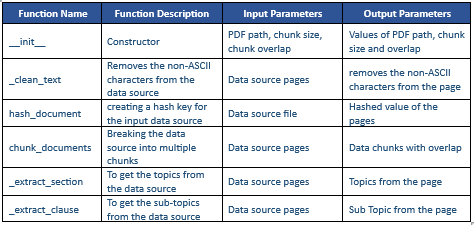

In [ ]:
#@title rag_scripts/documents_processing/chunking.py

%%writefile rag_scripts/documents_processing/chunking.py
import os
import logs
import hashlib
import traceback
import pymupdf as fitz
import regex as re
from typing import List, Dict, Tuple, Any
from langchain_text_splitters import RecursiveCharacterTextSplitter

from configuration import Configuration
from rag_scripts.interfaces import IDocumentChunker


class PyMuPDFChunker(IDocumentChunker):

    def __init__(self, pdf_path: str, chunk_size: int = Configuration.DEFAULT_CHUNK_SIZE,
                 chunk_overlap: int = Configuration.DEFAULT_CHUNK_OVERLAP):

        if not os.path.exists(pdf_path):
            raise FileNotFoundError(f"PDF file not found at: {pdf_path}")

        self.pdf_path = pdf_path
        self.chunk_size = chunk_size
        self.chunk_overlap = chunk_overlap
        self.text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=self.chunk_size,
            chunk_overlap=self.chunk_overlap,
            length_function =len,
            separators=["\n\n","\n","(?<=\. )\n",
                        "(?<=[a-z0-9]\.)","(?<=\? )", "(?<=\! )",
                        " ","" ] )

        logs.logger.info(f"Initialized PyMuPDFChunker for {os.path.basename(pdf_path)} with chunk_size = {chunk_size} and chunk overlap = {chunk_overlap}")

    def _clean_text(self, text: str) -> str:
        try:
            text = text.replace('\u25cf','').replace('\u2022','')
            text = text.replace('\u201c','').replace('\u201d','')
            text = text.replace('\u2013','-').replace('\u2014','-').replace('\u2015','-')
            text = re.sub(r'\n\s*\n',' ',text)
            text = re.sub(r' {2,}', ' ',text)
            text = text.replace('\\nb','')
            text = '\n'.join([line.strip() for line in text.split('\n')])
            text = re.sub(r'[^\x20-\x7E\t\n\r]', '', text)
            return text.strip()
        except Exception as ex:
            logs.logger.info(f"Failed to clean text: {ex}")
            traceback.print_exc()
            logs.logger.info(traceback.print_exc())

            return text.strip()


    def hash_document(self):
        try:
            hasher = hashlib.sha256()
            with open(self.pdf_path, 'rb') as fl:
                while chunk:=fl.read(8192):
                    hasher.update(chunk)
            return hasher.hexdigest()
        except Exception as ex:
            logs.logger.info(f"Exception hashing PDF {self.pdf_path}: {ex}")
            logs.logger.info(traceback.print_exc())
            raise ValueError(f"Failed to hash PDF: {ex}")

    def chunk_documents(self) -> Tuple[str, List[Dict[str, Any]]]:
        try:
            doc_hash = self.hash_document()
            doc_chunks =[]

            with fitz.open(self.pdf_path) as document:
                for idx, page in enumerate(document):
                    page_text = page.get_text()
                    if page_text.strip():
                        section = self._extract_section(page_text)
                        clause = self._extract_clause(page_text)
                        page_text = self._clean_text(page_text)
                        chunked_page = self.text_splitter.split_text(page_text)
                        for chunk_idx, chunk_content in enumerate(chunked_page):
                            if not chunk_content.strip():
                                continue
                            doc_chunks.append({
                                "content":chunk_content.strip(),
                                "metadata":{
                                    "document_id":doc_hash,
                                    "source_file":os.path.basename(self.pdf_path),
                                    "page_number": idx+1,
                                    "chunk_id":f"{doc_hash} - {idx + 1} -{chunk_idx}",
                                    "section": section or "Unknown Section",
                                    "clause": clause or "Unknown Clause",
                                    "chunk_index_on_page": chunk_idx
                                }
                            })
            if not doc_chunks:
                logs.logger.info(f"No text or chunks extracted from {self.pdf_path} after cleaning")
                return doc_hash,[]
            else:
                logs.logger.info(f"success Document chunked {self.pdf_path} into {len(doc_hash)} chunks")
                return doc_hash,doc_chunks



        except Exception as ex:
            logs.logger.info(f"Exception in document chunking {ex}")
            traceback.print_exc()
            return self.hash_document(), []


    def _extract_section(self, text: str) -> str:
        match_major = re.search(r'^(?:[IVX]+\.?\s+|[A-Z]\.?\s+|[0-9]+\.?\s+)(.+)', text, re.MULTILINE)
        if match_major:
            return match_major.group(0)

        match_firstline = re.search(r'^\s*([A-Za-z0-9][\w\s,&\'-]+?)\s*$', text, re.MULTILINE)
        if match_firstline:
            return match_firstline.group(1).strip()

        return None


    def _extract_clause(self,text) -> str:
        match = re.search(r'^(?:(?:•|●|-|\*|\d+\.|\([a-z]\)|\([A-Z]\)|\w\))\s*)(.+?)(?=\n(?:•|●|-|\*|\d+\.|\([a-z]\)|\([A-Z]\)|\w\))|\n\n|\Z)', text, re.MULTILINE | re.DOTALL)
        if match:
            clause = match.group(1).strip()
            if len(clause.split()) < 10:
                next_match = re.search(
                    r'^(?:(?:•|●|-|\*|\d+\.|\([a-z]\)|\([A-Z]\)|\w\))\s*)(.+?)(?=\n(?:•|●|-|\*|\d+\.|\([a-z]\)|\([A-Z]\)|\w\))|\n\n|\Z)',
                    text[match.end():], re.MULTILINE | re.DOTALL)
                if next_match:
                    clause += " " + next_match.group(0).strip()
            return clause

        match_para = re.search(r'^(?!#|\s*$).*?\n\n',text,re.DOTALL)
        if match_para:
            return match_para.group(0).strip()
        return None

Writing rag_scripts/documents_processing/chunking.py


## **rag_scripts/embedding/embedder.py**

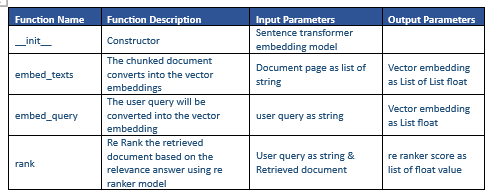

In [ ]:
#@title rag_scripts/embedding/embedder.py

%%writefile rag_scripts/embedding/embedder.py
import os
import logs
import traceback
from typing import List
from sentence_transformers import SentenceTransformer
from traits.trait_types import self

from configuration import Configuration
from rag_scripts.interfaces import IEmbedder

class SentenceTransformerEmbedder(IEmbedder):
    def __init__(self, model_name: str = Configuration.DEFAULT_SENTENCE_TRANSFORMER_MODEL):
        self.model_name = model_name
        try:
            self.model = SentenceTransformer(self.model_name)
            logs.logger.info(f'Sentence Transformer loaded {self.model_name}')
        except Exception as ex:
            logs.logger.info(f"Exception in loading Sentence Transformer {self.model_name}")
            traceback.print_exc()
            raise


    def embed_texts(self, texts: List[str]) -> List[List[float]]:
        try:
            embeddings = self.model.encode(texts).tolist()
            return embeddings
        except Exception as ex:
            logs.logger.info(f"Exception in embedding: {ex}")
            traceback.print_exc()
            return [[] for _ in texts]

    def embed_query(self,query: str) -> List[float]:
        try:
            logs.logger.info(f"Embedding query: {query}")
            embedding = self.model.encode(query).tolist()
            return embedding
        except Exception as ex:
            logs.logger.info(f"Exception in query embedding: {ex}")
            traceback.print_exc()
            return []

    def rank(selfself,Query: str, documents:List[str]) -> List[float]:
        if not documents:
            return []
        try:
            sentence_paris = [[Query, doc] for doc in documents]
            scores = self.model.predict(sentence_paris)
            return scores.tolist()
        except Exception as ex:
            logs.logger.info(f"Exception in ranking: {ex}")
            traceback.print_exc()
            return []

Writing rag_scripts/embedding/embedder.py


## **rag_scripts/embedding/vector_db/**  chroma_db.py  || faiss_db.py  || pinecoe_db.py

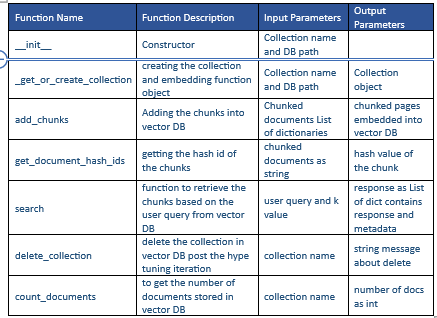

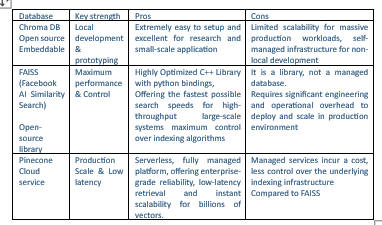

In [ ]:
#@title rag_scripts/embedding/vector_db/chroma_db.py

%%writefile rag_scripts/embedding/vector_db/chroma_db.py

import chromadb
import logs
import traceback
from typing import List, Dict, Any
from chromadb.api.types import EmbeddingFunction
from configuration import Configuration
from rag_scripts.interfaces import IVector
from rag_scripts.interfaces import IEmbedder
from rag_scripts.embedding.embedder import SentenceTransformerEmbedder

class chromaDBEmbeddingFunction(EmbeddingFunction):

    def __init__(self, embedder: IEmbedder):
        self.embedder = embedder

    def __call__(self, texts: List[str]) -> List[List[float]]:
        return self.embedder.embed_texts(texts)

class chromaDBVectorDB(IVector):
    def __init__(self, embedder:IEmbedder, db_path: str = Configuration.CHROMA_DB_PATH, collection_name: str = Configuration.COLLECTION_NAME):
        super().__init__(embedder, db_path, collection_name)

        self.client = chromadb.PersistentClient(path=self.db_path)
        self.chroma_embed_function = chromaDBEmbeddingFunction(self.embedder)
        self.collection = self._get_or_create_collection()
        logs.logger.info(f"Chroma DB intialized path = {self.db_path}, collection = {self.collection_name}")

    def _get_or_create_collection(self):
        return self.client.get_or_create_collection(
            name=self.collection_name,
            embedding_function=self.chroma_embed_function)


    def add_chunks(self,documents: List[Dict[str,Any]]) -> List[str]:
        try:
            if not documents:
                return []
            ids = [doc['metadata']['chunk_id'] for doc in documents]
            contents = [doc['content'] for doc in documents]
            metadatas = [doc['metadata'] for doc in documents]

            self.collection.add(documents=contents, metadatas=metadatas,ids=ids)

            logs.logger.info(f"Added {len(ids)} chunks to chroma db")
            return ids
        except Exception as ex:
            logs.logger.info(f"Exception in adding chunks to chromaDB: {ex}")
            traceback.print_exc
            return[]

    def get_document_hash_ids(self, document_hash: str) -> List[str]:

        try:
            result = self.collection.get(where={"document_id":document_hash},limit=1)
            return result['ids'] if result and result['ids'] else []
        except Exception as ex:
            logs.logger.info(f"Exception getting document hash {document_hash} from chromadb {ex}")
            traceback.print_exc
            return[]

    def search(self, query: str, k: int=3) -> List[Dict[str, Any]]:
        try:
            search_result = self.collection.query(
                query_texts = [query],
                n_results=k,
                include=['documents','metadatas','distances']
            )
            retrieved_documents =[]
            if search_result and search_result['documents'] and search_result['metadatas']:
                for indx in range(len(search_result['documents'][0])):
                    document_content = search_result['documents'][0][indx]
                    document_metadata = search_result['metadatas'][0][indx]
                    document_distance = search_result['distances'][0][indx]

                    retrieved_documents.append({
                        "content": document_content,
                        "metadata": document_metadata,
                        "distance": document_distance })
            logs.logger.info(f"Rettrieved {len(retrieved_documents)} documents from chroma DB for query: '{query}'")

            return retrieved_documents
        except Exception as ex:
            logs.logger.info(f"Exception in Chroma db search: {ex}")
            traceback.print_exc()
            return []

    def delete_collection(self, collection_name: str):
        try:
            self.client.delete_collection(name = collection_name)
            logs.logger.info(f"Chroma DB collection {collection_name} deleted")
            self.collection = self._get_or_create_collection()
        except Exception as ex:
            logs.logger.info(f"Exception in deleting the chroma db collection: {collection_name}")
            traceback.print_exc()

    def count_documents(self) -> int:
        try:
            return self.collection.count()
        except Exception as ex:
            logs.logger.info(f"Exception in counting documents in chroma db: {ex}")
            traceback.print_exc()
            return 0

Writing rag_scripts/embedding/vector_db/chroma_db.py


In [ ]:
#@title rag_scripts/embedding/vector_db/faiss_db.py

%%writefile rag_scripts/embedding/vector_db/faiss_db.py
import os
import logs
import faiss
import pickle
import traceback
import numpy as np
from typing import List, Dict, Any

from configuration import Configuration
from rag_scripts.interfaces import IVector, IEmbedder
from rag_scripts.embedding.embedder import SentenceTransformerEmbedder

class FAISSVectorDB(IVector):

    def __init__(self, embedder: IEmbedder, db_path: str= Configuration.FAISS_DB_PATH,
                 collection_name: str = Configuration.COLLECTION_NAME):
        super().__init__(embedder,db_path,collection_name)
        self.index = None
        self.doc_store: List[Dict[str,Any]] =[]

        self.collection_file = os.path.join(self.db_path,f"{self.collection_name}.faiss")
        self.doc_store_file = os.path.join(self.db_path, f"{self.collection_name}_docs.pkl")

        os.makedirs(self.db_path, exist_ok=True)

        self._load_index()

        logs.logger.info(f"FAISSDB Initalized: path ='{self.db_path}, collection ='{self.collection_name}")


    def _load_index(self):
        try:
            if os.path.exists(self.collection_file) and os.path.exists(self.doc_store_file):
                self.index = faiss.read_index(self.collection_file)
                with open(self.doc_store_file,'rb') as f:
                    self.doc_store = pickle.load(f)
                logs.logger.info(f"Loaded Existing FAISS index and doc store from {self.collection_file}")
            else:
                logs.logger.info(f"No Existing FAISS index found, need new collection")
        except Exception as ex:
           logs.logger.info(f"Exception in loading FAISS index: {ex}")
           traceback.print_exc()
           self.index = None
           self.doc_store = []

    def _save_index(self):
        try:
            if self.index is not None:
                faiss.write_index(self.index, self.collection_file)
                with open(self.doc_store_file, "wb") as f:
                    pickle.dump(self.doc_store,f)
                logs.logger.info(f"FAISS index and doc store saved to {self.collection_file}")

        except Exception as ex:
            logs.logger.info(f"Exception in saving FAISS index: {ex}")
            traceback.print_exc()

    def add_chunks(self, documents: List[Dict[str, Any]]) -> List[str]:
        try:
            if not documents:
                return[]

            contents = [doc['content'] for doc in documents]
            embeddings = np.array(self.embedder.embed_texts(contents),dtype='float32')

            if self.index is None:
                dimension = embeddings.shape[1]
                self.index = faiss.IndexFlatL2(dimension)
                logs.logger.info(f"Created New FAISS index with dimension {dimension}")

            self.index.add(embeddings)

            for doc in documents:
                self.doc_store.append(doc)

            self._save_index()
            chunk_ids = [doc['metadata']['chunk_id'] for doc in documents]
            logs.logger.info(f"Added {len(chunk_ids)} chunks to FAISS index")
            return chunk_ids
        except Exception as ex:
            logs.logger.info(f"Exception in adding chunks to FAISS: {ex}")
            traceback.print_exc()
            return []

    def get_document_hash_ids(self, document_hash: str) ->List[str]:
        try:
            found_ids =[]
            for doc in self.doc_store:
                if doc['metadata'].get('document_id') == document_hash:
                    found_ids.append(doc['metadata']['chunk_id'])

            return found_ids
        except Exception as ex:
            logs.logger.info(f"Exception in get document hash {ex}")

    def search(self, query: str, k:int=3) -> List[Dict[str,Any]]:
        try:
            if self.index is None or self.index.ntotal ==0:
                logs.logger.info(f"FAISS index is empty or not intialized")
                return []
            query_embedding = np.array(self.embedder.embed_query(query),dtype='float32').reshape(1,-1)
            distances, indices = self.index.search(query_embedding,k)

            retrieved_documents = []
            for dist, idx in zip(distances[0], indices[0]):
                if 0 <= idx < len(self.doc_store):
                    doc = self.doc_store[idx]
                    retrieved_documents.append({
                        "content":doc['content'],
                        "metadata":doc['metadata'],
                        "distance":float(dist) })
            logs.logger.info(f"Retrieved {len(retrieved_documents)} documents from FAISS for query: {query}")

            return retrieved_documents


        except Exception as ex:
            logs.logger.info(f"Exception in FAISS db search {ex}")
            traceback.print_exc()
            return []

    def delete_collection(self,collection_name: str):
        try:
            if os.path.exists(self.collection_file):
                os.remove(self.collection_file)
            if os.path.exists(self.doc_store_file):
                os.remove(self.doc_store_file)
            self.index = None
            self.doc_store = []
            logs.logger.info(f"FAISS collection files for {collection_name} deleted")

        except Exception as ex:
            logs.logger.info(f"Error deleting FAISS collection files for {collection_name}: ex")
            traceback.print_exc

    def count_documents(self) -> int:
        try:
            return self.index.ntotal if self.index is not None else 0
        except Exception as ex:
            logs.logger.info(f"Exception in counting document in FAISS: {ex}")
            traceback.print_exc()
            return 0

Writing rag_scripts/embedding/vector_db/faiss_db.py


In [ ]:
#@title rag_scripts/embedding/vector_db/pinecone_db.py

%%writefile rag_scripts/embedding/vector_db/pinecone_db.py

import time
import logs
import traceback
from typing import List, Dict,Any
import re
from pinecone import Pinecone, ServerlessSpec
from pinecone.exceptions import PineconeException

from configuration import Configuration
from rag_scripts.interfaces import IVector, IEmbedder

class PineconeVectorDB(IVector):
    def __init__(self, embedder:IEmbedder, db_path: str, collection_name: str="flykite"):
        super().__init__(embedder,db_path,collection_name)

        self.api_key = Configuration.PINECONE_API_KEY
        self.cloud = Configuration.PINECONE_CLOUD
        self.region = Configuration.PINECONE_REGION

        if not self.api_key:
            raise ValueError("Pinecone API KEY not provided in configuration")

        self.pc = Pinecone(api_key=self.api_key)
        collection_name = collection_name.replace('_','-')
        self.index_name=collection_name

        logs.logger.info(f"Collection name: {collection_name}")

        self.dim=len(self.embedder.embed_texts(["test"])[0])
        self._create_index()
        self.index=self.pc.Index(self.index_name)

        logs.logger.info(f"Pinecone DB Initialized index= {self.index_name}, cloud= {self.cloud}, region = {self.region}")

    def _create_index(self):
        try:
            existing_indexes = self.pc.list_indexes().names()
            if self.index_name in existing_indexes:
                index = self.pc.Index((self.index_name))
                index_info = index.describe_index_stats()
                if index_info.dimension!=self.dim:
                    logs.logger.info(f"Pinecone DB Index already exists {self.index_name} "
                          f"with dimension {index_info.dimension}"
                          f"but the expected dimension is {self.dim}"
                          " so deleting it and recreating again"
                          )
                    self.pc.delete_index(self.index_name)

                    for _ in range(30):
                        if self.index_name not in self.pc.list_indexes().names():
                            break
                        else:
                            time.sleep(2)


                elif index_info.metric!='cosine':
                    self.pc.delete_index(self.index_name)

                    for _ in range(30):
                        if self.index_name in self.pc.list_indexes().names():
                            time.sleep(2)
                        else:
                            break
                else:
                    logs.logger.info(f"Pinecone index already exists {self.index_name} ")
                    return

            if self.index_name not in self.pc.list_indexes().names():
                self.pc.create_index(name=self.index_name,
                    dimension=self.dim,
                    metric='cosine',
                    spec=ServerlessSpec(cloud=self.cloud,region=self.region)
                )
                max_attempts = 90
                for attempt in range(max_attempts):
                    try:
                        index = self.pc.Index(self.index_name)
                        index_info = index.describe_index_stats()
                        if index_info.dimension == self.dim:
                            logs.logger.info(f"Pinecone index {self.index_name} already exists ")
                            return
                    except PineconeException:
                        pass
                    time.sleep(2)
                raise TimeoutError(f"Pinecone index {self.index_name} does not exist")


        except PineconeException as ex:

            logs.logger.info(f"Exception creating Pinecone index: {ex}")
            traceback.print_exc()
            raise
        except Exception as ex:
            logs.logger.info(f"Exception creating Pinecone index: {ex}")
            traceback.print_exc()
            raise



    def add_chunks(self, documents: List[Dict[str,Any]]) -> List[str]:
        try:
            if not documents:
                return[]
            vectors_info = []
            for doc in documents:
                content = doc['content']
                embedding = self.embedder.embed_texts([content])[0]
                chunk_id = doc['metadata']['chunk_id']
                metadata= doc['metadata'].copy()
                metadata['content']=content

                vectors_info.append({
                    "id":chunk_id, "values":embedding, "metadata":metadata
                })

            logs.logger.info(f"Upserting {len(vectors_info)} to pincone index")
            self.index.upsert(vectors=vectors_info)
            chunk_ids = [vec['id'] for vec in vectors_info]
            logs.logger.info(f"Added {len(chunk_ids)} chunks to pinecone index {self.index_name}")
            logs.logger.info(f"Added chunk ids {chunk_ids[:5]}")
            return chunk_ids

        except PineconeException as ex:
            logs.logger.info(f"Exception in adding chunks to pinecone db {ex}")
            traceback.print_exc()
            return []

    def get_document_hash_ids(self, document_hash: str) ->List[str]:
        try:
            vector_sample = [0.0]*self.dim
            result = self.index.query(
                vector = vector_sample,
                filter = {"document_id": {"$eq": document_hash}},
                top_k = 10000,
                include_metadata=False )

            return [match['id'] for match in result['matches']]

        except PineconeException as ex:
            logs.logger.info(f"Exception getting document hash IDs from pinecone: {ex}")
            traceback.print_exc()
            return []

    def search(self,query: str, k:int=3) -> List[Dict[str,Any]]:
        try:
            logs.logger.info(f"searching pinecode index {self.index_name} for query {query}")
            query_embedding = self.embedder.embed_query(query)
            result = self.index.query(
                vector=query_embedding,
                top_k=k,
                include_metadata=True
            )

            retrieved_documents = []
            for match in result['matches']:
                md= match['metadata']
                content = md.pop('content','')

                retrieved_documents.append({
                    "content":content,
                    "metadata":md,
                    "distance":match['score']
                })

            logs.logger.info(f"Retrieved {len(retrieved_documents)} documents from pinecone for query: {query}")

            return retrieved_documents


        except PineconeException as ex:
            logs.logger.info(f"Exception in Pinecone search: {ex}")
            traceback.print_exc()
            return[]

    def delete_collection(self, collection_name: str):
        try:

            self.pc.delete_index(collection_name)
            logs.logger.info(f"Pinecone index {collection_name} deleted")
        except PineconeException as ex:
            logs.logger.info(f"Exception in deleting pinecone index: {collection_name} {ex}")
            traceback.print_exc()

    def count_documents(self) -> int:
        try:
            for attempt in range(19):
                status = self.index.describe_index_stats()
                count = status.get('total_vector_count',0)
                if count > 0:
                    return count
                time.sleep(7)
            logs.logger.info(f"No vectors found in index: {self.index_name}")
            return 0

        except PineconeException as ex:
            logs.logger.info(f"EXception in getting document counts: {ex}")
            traceback.print_exc()
            return 0

Writing rag_scripts/embedding/vector_db/pinecone_db.py


## **rag_scripts/evaluation/evaluator.py**

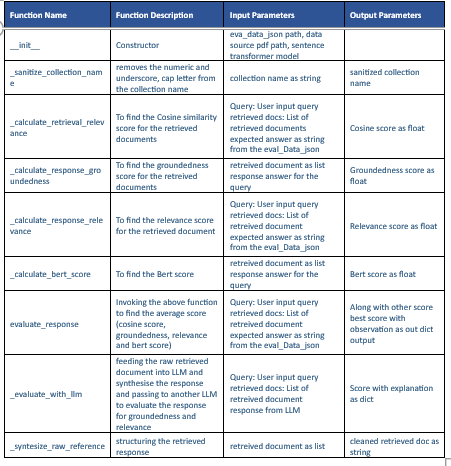

In [ ]:
#@title rag_scripts/evaluation/evaluator.py

%%writefile rag_scripts/evaluation/evaluator.py
import os
import re
import time
import json
import random
import joblib
import traceback
import logs
import torch
import transformers
from bert_score import score
from itertools import product
from datetime import datetime
from typing import List, Dict, Any
from configuration import Configuration
from rag_scripts.llm.llmResponse import GROQLLM
from pinecone import Pinecone, PineconeException
from rag_scripts.rag_pipeline import RAGPipeline
from sentence_transformers import SentenceTransformer, util
from rag_scripts.embedding.vector_db.faiss_db import FAISSVectorDB
from rag_scripts.documents_processing.chunking import PyMuPDFChunker
from rag_scripts.embedding.embedder import SentenceTransformerEmbedder
from rag_scripts.embedding.vector_db.chroma_db import chromaDBVectorDB
from rag_scripts.embedding.vector_db.pinecone_db import PineconeVectorDB

VECTOR_DB_CONSTRUCTORS = {
    "chroma": chromaDBVectorDB,
    "faiss": FAISSVectorDB,
    "pinecone": PineconeVectorDB
}

class RAGEvaluator:
    def __init__(self, eval_data_path: str = Configuration.EVAL_DATA_PATH,
                 pdf_path: str = Configuration.FULL_PDF_PATH):
        if not os.path.exists(eval_data_path):
            raise FileNotFoundError(f"Evaluation data not found at: {eval_data_path}")

        if not os.path.exists(pdf_path):
            raise FileNotFoundError(f"PDF document not found at: {pdf_path}")

        with open(eval_data_path, 'r') as f:
            self.eval_queries = json.load(f)

        self.pdf_path = pdf_path
        self.embedder = SentenceTransformer(Configuration.DEFAULT_SENTENCE_TRANSFORMER_MODEL)
        logs.logger.info(f"RAG Evaluator initialized with {len(self.eval_queries)} evaluation queries")

    def _sanitize_collection_name(self, name: str) -> str:
        sanitized = re.sub(r'[^a-z0-9]', '-', name.lower())
        sanitized = re.sub(r'-+', '-', sanitized).strip('-')
        return sanitized[:45].rstrip('-') if len(sanitized) > 45 else sanitized

    def _calculate_retrieval_relevance(self, query: str, retrieved_docs: List[Dict[str, Any]],
                                       expected_answer: str =None) -> float:
        if not retrieved_docs:
            logs.logger.warning(f"No retrieved documents for query: {query}")
            return 0.0

        query_embedding = self.embedder.encode(query, convert_to_tensor=True, normalize_embeddings=True)
        reference_embedding = [query_embedding]

        score_cosine = []
        for doc in retrieved_docs:
            doc_content = doc.get('content','')
            if not doc_content.strip():
                continue
            doc_embedding = self.embedder.encode(doc_content, convert_to_tensor=True, normalize_embeddings=True)
            max_sim_to_reference = 0.0
            for ref_embedding in reference_embedding:
                sim = util.cos_sim(ref_embedding, doc_embedding)
                if  isinstance(sim,torch.Tensor):
                    sim_value = sim.item()
                else:
                    sim_value = sim
                if sim_value > max_sim_to_reference:
                    max_sim_to_reference = sim_value
            score_cosine.append(max_sim_to_reference)
        cosine_score = sum(score_cosine) / len(score_cosine) if score_cosine else 0.0

        logs.logger.info(f"Max cosine score for query '{query}': {cosine_score}")
        return cosine_score

    def _calculate_response_groundedness(self, response: Dict[str,Any], retrieved_docs: List[Dict[str, Any]]) -> float:
        try:
            if not retrieved_docs:
                logs.logger.warning(f"No retrieved documents for groundedness evaluation")
                return 0.0
            response_text = response.get("summary","")
            if not isinstance(response_text,str):
                response_text = str(response_text)

            response_segments = re.split(r'[\u25cf\u25cb]\s*|\n\s*\n', response_text.strip())
            response_segments = [seg.strip() for seg in response_segments if seg.strip()]

            groundedness_scores = []
            for doc in retrieved_docs:
                doc_content = doc.get('content','')
                if not doc_content.strip():
                    continue
                doc_embedding = self.embedder.encode(doc_content,
                                            convert_to_tensor=True,
                                            normalize_embeddings=True)
                for segment in response_segments:
                    if segment:
                        segment_embedding = self.embedder.encode(segment,
                                                    convert_to_tensor=True,
                                                    normalize_embeddings=True)

                        segment_similarity = util.cos_sim(segment_embedding,
                                                          doc_embedding).item()
                        groundedness_scores.append(segment_similarity)

                full_response_embedding = self.embedder.encode(response_text,
                                                        convert_to_tensor=True,
                                                        normalize_embeddings=True)
                full_response_similarity = util.cos_sim(full_response_embedding,doc_embedding).item()
                groundedness_scores.append(full_response_similarity)

            groundedness = max(
                groundedness_scores) if groundedness_scores else 0.0  # Use max to handle structured responses
            logs.logger.info(f"Max groundedness score for response: {groundedness:.2f}")
            return groundedness
        except Exception as ex:
            logs.logger.error(f"Exception in calculating groundedness: {ex}")
            traceback.print_exc()
            return 0.0

    def _calculate_response_relevance(self, query: str, response: Dict[str,Any],expected_answer: str=None) -> float:
        try:
            response_text = response.get("summary","")
            response_text = response_text.replace('\n','')
            if not isinstance(response_text,str) or not response_text.strip():
                return 0.0

            reference_text = expected_answer if expected_answer is not None and  expected_answer.strip() else query

            refernce_embedding = self.embedder.encode(reference_text,convert_to_tensor=True,normalize_embeddings=True)

            response_embedding = self.embedder.encode(response_text, convert_to_tensor=True, normalize_embeddings=True)
            similarity = util.cos_sim(refernce_embedding, response_embedding).item()

            response_length = len(response_text.split())

            reference_length = len(reference_text.split())
            length_penalty_factor = 1.0
            if response_length > (reference_length*1.5) and response_length >50:
                length_penalty_factor = max(0.8,1.0-(response_length-(reference_length*2))/100.0)
            elif response_length < (reference_length*0.5) and response_length >20:
                length_penalty_factor = max(0.5,response_length/(reference_length*0.5))

            adjusted_relevance = similarity * length_penalty_factor
            logs.logger.info(
                f"Relevance score for query '{query}': {adjusted_relevance:.2f} (similarity: {similarity:.2f}, penalty: {length_penalty_factor:.2f})")
            return adjusted_relevance
        except Exception as ex:
            logs.logger.info.error(f"Exception in relevance score calculation: {ex}")
            traceback.print_exc()
            return 0.0

    def _calculate_bert_score(self, response: Dict[str,Any], reference: str) -> float:
        try:
            response_text = response.get("summary", "")
            if not isinstance(response_text, str):
                logs.logger.warning("Response text is not a string")
                return 0.0
            if not response_text:
                logs.logger.error(f"No retrieved documents for BERT score evaluation")
                return 0.0
            if not reference.strip():
                logs.logger.warning(f"No reference answer provided for BERTScore calculation")
                return 0.0
            transformers.utils.logging.set_verbosity_error()
            _, _, f1 = score([response_text], [reference], lang="en", model_type="roberta-large")
            transformers.utils.logging.set_verbosity_warning()
            bert_score_value = f1.item()
            logs.logger.info(f"BERT score: {bert_score_value:.2f}")
            return bert_score_value
        except Exception as ex:
            logs.logger.error(f"Exception in BERT score calculation: {ex}")
            traceback.print_exc()
            return 0.0

    def evaluate_response(self, query: str, response: Dict[str,Any], retrieved_docs: List[Dict[str, Any]],
                         expected_keywords: List[str] = None, expected_answer: str = None) -> Dict[str, Any]:
        try:
            cosine_score = self._calculate_retrieval_relevance(query, retrieved_docs,expected_answer=expected_answer)
            groundedness = self._calculate_response_groundedness(response, retrieved_docs)
            relevance = self._calculate_response_relevance(query, response,expected_answer=expected_answer)
            bert_score = self._calculate_bert_score(response, expected_answer) if expected_answer else 0.0

            observations = []
            if groundedness < 0.6:
                observations.append(f"Response may contain ungrounded information (groundedness score: {groundedness:.2f})")
            else:
                observations.append(f"Response is well grounded (score: {groundedness:.2f})")

            if relevance < 0.7:
                observations.append(f"Response may not fully address the question (relevance score: {relevance:.2f})")
            else:
                observations.append(f"Response is highly relevant (score: {relevance:.2f})")

            if cosine_score < 0.5:
                observations.append(f"Low similarity between query and retrieved documents")

            if bert_score < 0.7 and expected_answer:
                observations.append(f"Low BERT score, semantic mismatch with reference answer")

            return {
                "cosine_score": round(cosine_score, 2),
                "groundedness": round(groundedness, 2),
                "relevance": round(relevance, 2),
                "bert_score": round(bert_score, 2),
                "observations": "; ".join(observations)
            }

        except Exception as ex:
            logs.logger.error(f"Exception in calculating response scores: {ex}")
            traceback.print_exc()
            return {
                "cosine_score": 0.0,
                "groundedness": 0.0,
                "relevance": 0.0,
                "bert_score": 0.0,
                "observations": f"Error in evaluation: {ex}"
            }

    def evaluate_combined_params_grid(self,
                                     chunk_size_to_test: List[int],
                                     chunk_overlap_to_test: List[int],
                                     embedding_models_to_test: List[str],
                                     vector_db_types_to_test: List[str],
                                      re_ranker_model: List[str],
                                     llm_model_name: str = Configuration.DEFAULT_GROQ_LLM_MODEL,
                                     search_type: str = "grid",
                                     n_iter: int = 50) -> Dict[str, Any]:
        logs.logger.info("\n--- Starting the evaluation of best parameters ---")
        best_score = -1.0
        best_params = {}
        best_metrics = {}
        results = []

        param_combination = [(c_size, c_overlap, embed_model, db_type,re_ranker)
                             for c_size, c_overlap, embed_model, db_type,re_ranker in product(
                                 chunk_size_to_test, chunk_overlap_to_test,
                                 embedding_models_to_test, vector_db_types_to_test,re_ranker_model)
                             if c_overlap < c_size]

        param_to_test = (random.sample(param_combination, min(n_iter, len(param_combination)))
                         if search_type.lower() == 'random' else param_combination)
        logs.logger.info(f"Testing {len(param_to_test)} {'random' if search_type.lower() == 'random' else 'all'} "
                    f"combinations out of {len(param_combination)}")

        for idx, (c_size, c_overlap, embed_model, db_type,re_ranker) in enumerate(param_to_test, 1):
            logs.logger.info('-'*50)
            logs.logger.info(f"\nIteration {idx}/{len(param_to_test)} \nchunk_size: {c_size} \nchunk_overlap: {c_overlap} "
                        f"\nembed_model: {embed_model} \nvector_db: {db_type}")

            current_params_str = f"Chunk: {c_size}-{c_overlap}- Embed- {embed_model}- DB-{db_type}-{re_ranker}"
            embed_model = embed_model.replace('_', '-')
            temp_collection_name = self._sanitize_collection_name(
                f"{Configuration.COLLECTION_NAME}-{search_type}-{c_size}-{c_overlap}-{embed_model}-{db_type}")
            temp_db_path = os.path.join(Configuration.DATA_DIR, f"{db_type}_temp_{search_type}_{c_size}_{c_overlap}_{embed_model}_{embed_model}")
            os.makedirs(temp_db_path, exist_ok=True)

            vector_db_instance = None
            try:
                embedder = SentenceTransformerEmbedder(model_name=embed_model)
                db_constructor = VECTOR_DB_CONSTRUCTORS.get(db_type.lower())
                if not db_constructor:
                    logs.logger.error(f"Unsupported vector DB type: {db_type}")
                    continue
                vector_db_instance = db_constructor(embedder=embedder,
                                                    db_path=temp_db_path,
                                                    collection_name=temp_collection_name)


                chunker_instance = PyMuPDFChunker(pdf_path=self.pdf_path,
                                                 chunk_size=c_size,
                                                 chunk_overlap=c_overlap)

                llm_instance = GROQLLM(model_name=llm_model_name)

                pipeline = RAGPipeline(
                    document_path=self.pdf_path,
                    chunker=chunker_instance,
                    embedder=embedder,
                    vector_db=vector_db_instance,
                    llm=llm_instance,
                    chunk_size=c_size,
                    chunk_overlap=c_overlap,
                    embedding_model_name=embed_model,
                    llm_model_name=llm_model_name,
                    db_path=temp_db_path,
                    collection_name=temp_collection_name,
                    re_ranker_model_name=re_ranker
                )

                pipeline.build_index()
                if vector_db_instance.count_documents() == 0:
                    logs.logger.warning(f"No documents foundin vector DB after build for "
                                   f"{current_params_str}. skipping evaluation for this combination.")
                    continue

                cosine_scores = []
                groundedness_scores = []
                relevance_scores = []
                bert_scores = []

                for eval_item in self.eval_queries:
                    query = eval_item['query']
                    expected_answer = eval_item.get('expected_answer_snippet', '')

                    expected_keywords = eval_item.get('expected_keywords', [])
                    retrieved_docs = pipeline.retrieve_raw_documents(query, k=3)
                    response = pipeline.query(query, k=3)
                    logs.logger.debug(f"Query: {query} \n Response: {json.dumps(response,indent=2, ensure_ascii=False)}")
                    if not expected_answer.strip():
                        expected_answer = self._syntesize_raw_reference(retrieved_docs)


                    eval_result = self.evaluate_response(query, response,
                                            retrieved_docs,
                                            expected_answer=expected_answer,
                                            expected_keywords=expected_keywords)

                    cosine_scores.append(eval_result['cosine_score'])
                    groundedness_scores.append(eval_result['groundedness'])
                    relevance_scores.append(eval_result['relevance'])
                    bert_scores.append(eval_result['bert_score'])

                average_cosine_score = round(sum(cosine_scores) / len(cosine_scores) if cosine_scores else 0.0, 2)
                average_groundedness = round(sum(groundedness_scores) / len(groundedness_scores) if groundedness_scores else 0.0, 2)
                average_relevance = round(sum(relevance_scores) / len(relevance_scores) if relevance_scores else 0.0, 2)
                average_bert_score = round(sum(bert_scores) / len(bert_scores) if bert_scores and any(bert_scores) else 0.0, 2)

                average_score = round((0.2* average_cosine_score +
                                       0.35* average_groundedness +
                                      0.35* average_relevance +
                                       0.15*average_bert_score), 2)

                results.append({
                    "iteration": idx,
                    "chunk_size": c_size,
                    "chunk_overlap": c_overlap,
                    "embedding_model": embed_model,
                    "vector_db_type": db_type,
                    "average_retrieval_relevance_score": average_score,
                    "average_cosine_score": average_cosine_score,
                    "average_groundedness": average_groundedness,
                    "average_relevance": average_relevance,
                    "average_bert_score": average_bert_score
                })

                logs.logger.info(f"Average retrieval relevance score: {average_score}")
                logs.logger.info(f"Average cosine score: {average_cosine_score}")
                logs.logger.info(f"Average groundedness: {average_groundedness}")
                logs.logger.info(f"Average relevance: {average_relevance}")
                logs.logger.info(f"Average BERT score: {average_bert_score}")

                if average_score > best_score:
                    best_score = average_score
                    best_params = {
                        "iteration":idx,
                        "chunk_size": c_size,
                        "chunk_overlap": c_overlap,
                        "embedding_model": embed_model,
                        "vector_db_type": db_type,
                        "re_ranker_model":re_ranker
                    }
                    best_metrics = {
                        "average_retrieval_relevance_score": average_score,
                        "average_cosine_score": average_cosine_score,
                        "average_groundedness": average_groundedness,
                        "average_relevance": average_relevance,
                        "average_bert_score": average_bert_score,
                        "re_ranker_model":re_ranker
                    }

                    logs.logger.info(f"Best score: {best_score}")
                    logs.logger.info(f"Best params: {best_params}")

            except (PineconeException, ValueError) as ex:
                logs.logger.error(f"Exception in grid search for chunk_size={c_size}, "
                            f"chunk_overlap={c_overlap}, embed_model={embed_model}, vector_db={db_type}: {ex}")
                traceback.print_exc()
            finally:
                if 'vector_db_instance' in locals() and vector_db_instance is not None:
                    try:
                        vector_db_instance.delete_collection(temp_collection_name)
                        if isinstance(vector_db_instance, chromaDBVectorDB):
                            del vector_db_instance.client
                            time.sleep(5)
                        if isinstance(vector_db_instance, PineconeVectorDB):
                            pc = Pinecone(api_key=Configuration.PINECONE_API_KEY)
                            if temp_collection_name in pc.list_indexes().names():
                                pc.delete_index(temp_collection_name)
                                logs.logger.info(f"Pinecone index: {temp_collection_name} deleted")
                    except Exception as cleanup_ex:
                        logs.logger.error(f"Error during cleanup: {cleanup_ex}")
                        traceback.print_exc()

        logs.logger.info("\n---- Evaluation completed ----")
        logs.logger.info(f"Best parameters: {best_params}")
        logs.logger.info(f"Best score: {best_score:.2f}")
        logs.logger.info(f"Total iterations evaluated: {len(results)}")

        pkl_directory = os.path.join(Configuration.DATA_DIR, "eval_results")
        os.makedirs(pkl_directory, exist_ok=True)
        timestamp = datetime.now().strftime("%Y%m%d_%H%M")
        pkl_file = os.path.join(pkl_directory, f"eval_results_{search_type}_{timestamp}.pkl")

        try:
            joblib.dump({
                "best_params": best_params,
                "best_score": best_score,
                "results": results,
                "best_metrics": best_metrics
            }, pkl_file)
            logs.logger.info(f"Results saved to {pkl_file}")
        except Exception as ex:
            logs.logger.error(f"Exception in saving results to {pkl_file}: {ex}")

        return {
            "best_params": best_params,
            "best_score": best_score,
            "results": results,
            "best_metrics": best_metrics,
            "pkl_file": pkl_file
        }


    def _evaluate_with_llm(self, query:str, response_summary: str,retrieved_docs_contents: List[str]) -> Dict[str,Any]:
        try:
            context = "\n".join(retrieved_docs_contents)
            system_message = f"""
                You are an expert, Impartial judge for evaluating Retrieval Augmented Generation (RAG) system message.
                Your ONLY task is to output a JSON object containing the evaluation score and reasoning.
                DO NOT include any other text, explanations, conversational remarks or markdown code blocks(```json).
                Strictly adhere to the requested JSON format.
                """
            prompt = f"""
                You are evaluating a RAG system's response.

                Query: "{query}"
                Retrieved context: --- {context} ---
                RAG Systems Response: "{response_summary}"

                please provide a score for Groundedness and Relevance on a scale of 1 to 5,
                where 5 is excellent and 1 is very poor.

                Groundedness: is how the response is supported *only* to the Retrieved context with  no hallucinations ?
                1. Contains significant information not supported by the context or contradicts it.
                2. Contains some unsupported information.
                3. Mostly grounded, but might have minor deviations or additions.
                4. Almost entirely grounded in the context.
                5. Fully and accurately, using only information from the context.

                Relevance: how well the response is directly and comprehensively answers the query based on the context ?
                1. Does not answer the query at all, or answers a different question.
                2. Addresses the query partially but misses significant part or is off-topic.
                3. Answer the query reasonably well, but could be more complete or focused.
                4. Answer the query well, covering most relevant aspects.
                5. Answer the query completely, accurately and concisely, directly addressing all aspects.

                output your assessment ONLY in the following JSON format. no other text.
                {{
                    "groundedness_score": <int> out of 5,
                    "relevance_score": <int> out of 5,
                    "reasoning": "Brief explanation for the scores."
                }}
            """

            eval_with_llm = GROQLLM(model_name="llama-3.3-70b-versatile")
            llm_response =  eval_with_llm.generate_response(
                prompt=prompt,
                system_message=system_message,
                temperature=0.1,
                top_p=0.95,
                max_tokens=1500)

            print("\n -- LLM Judge Raw Response --")
            print(llm_response)
            print('-'*50)

            eval_scores = json.loads(llm_response)
            return {
                "Groundedness score": eval_scores.get("groundedness_score",0),
                "Relevance score": eval_scores.get("relevance_score",0),
                "Reasoning": eval_scores.get("reasoning","")
            }
        except Exception as ex:
            logs.logger.error(f"Exception {ex}")
            logs.logger.error(traceback.print_exc())

            return {
                "Groundedness score": 0,
                "Relevance score": 0,
                "Reasoning": f"Exception in LLM evaluation: {ex}"
            }


    def _syntesize_raw_reference(self, retrieved_docs: List[Dict[str, Any]]) -> str:
        try:
            if not retrieved_docs:
                return  ""
            raw_content_snippets = [doc.get('content','') for doc in retrieved_docs if doc.get('content')]
            raw_answer = " ".join(raw_content_snippets)

            raw_answer = " ".join(raw_answer.split()).join(sorted(list(set(raw_answer.split()))))

            return raw_answer
        except Exception as ex:
            logs.logger.error(f"Exception {ex}")
            logs.logger.error(traceback.print_exc())
            return ""

Writing rag_scripts/evaluation/evaluator.py


## **rag_scripts/llm/llmResponse.py**

In [ ]:
#@title rag_scripts/llm/llmResponse.py

%%writefile rag_scripts/llm/llmResponse.py
import logs
import traceback
from typing import List, Dict, Any, Optional
from groq import Groq

from rag_scripts.interfaces import ILLM
from configuration import Configuration

class GROQLLM(ILLM):
    def __init__(self, api_key: str = Configuration.GROQ_API_KEY,
                 model_name: str = Configuration.DEFAULT_GROQ_LLM_MODEL):
        if not api_key:
            raise ValueError("Groq API not provided in env file")

        self.api_key = api_key
        self.model_name = model_name
        self.client = Groq(api_key=self.api_key)
        self.default_system_message = ("You are a helpful assistant for Flykite Airline HT Policy document queries."
                                       "provide a concise and accurate answers based strictly on the provided context."
                                       "Do not hallucinate or add ungrounded details.")

        logs.logger.info(f"Initialized Groq LLM with model: {self.model_name}")

    def generate_response(self, prompt, system_message: Optional[str] = None,
                          context: Optional[List[Dict]] = None,
                          temperature: float = 0.1,
                          top_p: float = 0.95,
                          max_tokens: int = 1000) -> str:
        try:
            complete_prompt = prompt
            if context:
                context_text ="\n".join([doc['content'] for doc in context])
                complete_prompt = f"Context:\n{context_text}\n\nQuestion: {prompt}"

            message = [{"role": "system", "content":system_message or self.default_system_message},
                       {"role":"user","content":complete_prompt} ]

            completion = self.client.chat.completions.create(
                model = self.model_name if self.model_name else Configuration.DEFAULT_GROQ_LLM_MODEL,
                messages= message,
                temperature=temperature if temperature is not None else 0.1,
                max_tokens=max_tokens if max_tokens is not None else 1000,
                top_p=top_p if top_p is not None else 0.95,
                stream=True, stop=None
            )

            response_content = ""
            for chunk in completion:
                if chunk.choices and chunk.choices[0].delta.content:
                    response_content+=chunk.choices[0].delta.content
            return response_content.strip()

        except Exception as ex:
            logs.logger.error(f"Exception in LLM response: {ex}")
            logs.logger.error(traceback.print_exc())

Writing rag_scripts/llm/llmResponse.py


## **create_user_db.py**

In [ ]:
#@title create_user_db.py
%%writefile create_user_db.py

import sqlite3
import hashlib
import traceback
import logs

from argon2 import hash_password


class CreateUserDB():
    def encrypttion_pwd(self,password):
        return hashlib.sha256(password.encode()).hexdigest()

    def setup_database(self):
        try:
            conn = sqlite3.connect('users.db')
            cursor = conn.cursor()
            cursor.execute('''
                    CREATE TABLE IF NOT EXISTS users (
                    username TEXT PRIMARY KEY,
                    password TEXT,
                    jobrole TEXT,
                    department TEXT,
                    location TEXT)
                    ''')
            cursor.execute("SELECT COUNT(*) FROM users")
            if cursor.fetchone()[0] == 0:
                users = [('admin', self.encrypttion_pwd('admin'), 'admin', 'admin', 'chennai'),
                    ('user1', self.encrypttion_pwd('user'), 'user', 'manager', 'chennai'),
                    ('user2', self.encrypttion_pwd('user'), 'user', 'pilot', 'chennai'),
                    ('user3', self.encrypttion_pwd('user'), 'user', 'engineer', 'chennai'),
                    ('user4', self.encrypttion_pwd('user'), 'user', 'cabin crew', 'chennai'),
                    ('user5', self.encrypttion_pwd('user'), 'user', 'ground staff', 'chennai')]
                cursor.executemany("INSERT INTO users VALUES(?,?,?,?,?)",users)
                conn.commit()
            else:
                logs.logger.info("Databases alerady contains users")

        except Exception as ex:
            traceback.print_exc()
            logs.logger.info(f"Exception occurred: {ex}")
        finally:
            if conn:
                conn.close()


if __name__ == "__main__":
    db_obj = CreateUserDB()
    db_obj.setup_database()

Writing create_user_db.py


## **HostingIntoHuggingFace.py**

In [ ]:
#@title HostingIntoHuggingFace.py

%%writefile HostingIntoHuggingFace.py
import logs
import inspect
import traceback
from huggingface_hub import HfApi, create_repo
from huggingface_hub.utils import RepositoryNotFoundError
from configuration import Configuration
class HostingInHuggingFace:
  def __init__(self):
    self.base_path = Configuration.PROJECT_ROOT
    self.hf_token = Configuration.HF_TOKEN
    self.repo_id = 'jpkarthikeyan/FlyKiteAirlines'

  def CreatingSpaceInHF(self):
    logs.logger.info(f"Function Name {inspect.currentframe().f_code.co_name}")
    api = HfApi()
    try:
      logs.logger.info(f"Checking for {self.repo_id} is correct or not")
      api.repo_info(repo_id = self.repo_id,
                    repo_type='space',
                    token = self.hf_token)
      logs.logger.info(f"Space {self.repo_id} already exists")
    except RepositoryNotFoundError:
      create_repo(repo_id=self.repo_id,
                  repo_type='space',
                  space_sdk='docker',
                  private=False,
                  token=self.hf_token)
      logs.logger.info(f"Space created in {self.repo_id}")
    except Exception as ex:
      logs.logger.info(f"Exception in creating space {ex}")
      logs.logger.info(traceback.print_exc())
    finally:
      logs.logger.info('-'*50)


  def UploadDeploymentFile(self):
    logs.logger.info(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      api = HfApi(token=self.hf_token)
      directory_to_upload = self.base_path
      logs.logger.info(f"Directory to upload {directory_to_upload} into HF Space {self.repo_id}")
      api.upload_folder(repo_id=self.repo_id, folder_path=directory_to_upload,
                        repo_type='space')
      logs.logger.info(f"Successfully upload {directory_to_upload} into {self.repo_id}")
      return True
    except Exception as ex:
      logs.logger.info(f"Exception occured {ex}")
      logs.logger.info(traceback.print_exc())
      return False
    finally:
      logs.logger.info('-'*50)

  def ToRunPipeline(self):
    try:
      self.CreatingSpaceInHF()
      if self.UploadDeploymentFile():
        logs.logger.info('Deployment pipeline completed')
        return True
      else:
        logs.logger.info('Deployment pipeline failed')
        return False
    except Exception as ex:
      logs.logger.info(f"Exception occured {ex}")
      logs.logger.info(traceback.print_exc())
      return False
    finally:
      logs.logger.info('-'*50)


if __name__ == '__main__':
    hosting = HostingInHuggingFace()
    hosting.ToRunPipeline()

Writing HostingIntoHuggingFace.py


In [ ]:
#@title app.py
%%writefile app.py
import os
import sys
import json
import streamlit as st
import warnings
import traceback
import logs
import chromadb
import hashlib
import sqlite3
import regex as re
from pinecone import Pinecone
from typing import Optional, Dict, Any
from sentence_transformers import util

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
warnings.filterwarnings("ignore")

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), 'src')))
from sentence_transformers import SentenceTransformer
from configuration import Configuration
from rag_scripts.rag_pipeline import RAGPipeline
from rag_scripts.documents_processing.chunking import PyMuPDFChunker
from rag_scripts.embedding.embedder import SentenceTransformerEmbedder
from rag_scripts.embedding.vector_db.chroma_db import chromaDBVectorDB
from rag_scripts.embedding.vector_db.faiss_db import FAISSVectorDB
from rag_scripts.embedding.vector_db.pinecone_db import PineconeVectorDB
from rag_scripts.llm.llmResponse import GROQLLM
from rag_scripts.evaluation.evaluator import RAGEvaluator


class RAGOperations:
    VALID_VECTOR_DB = {'chroma', 'faiss', 'pinecone'}

    @staticmethod
    def check_db(vector_db_type: str, db_path: str, collection_name: str) -> bool:
        try:
            if vector_db_type not in RAGOperations.VALID_VECTOR_DB:
                logs.logger.info(f"Invalid Vector DB: {vector_db_type}")
                raise
            if vector_db_type.lower() == 'pinecone':
                pc = Pinecone(api_key=Configuration.PINECONE_API_KEY)
                return collection_name in pc.list_indexes().names()
            elif vector_db_type.lower() == 'chroma':
                if not os.path.exists(db_path):
                    return False
                client = chromadb.PersistentClient(path=db_path)
                try:
                    client.get_collection(collection_name)
                    return True
                except:
                    return False


            elif vector_db_type.lower() == "faiss":
                faiss_index_file = os.path.join(db_path, f"{collection_name}.faiss")
                faiss_doc_store_file = os.path.join(db_path, f"{collection_name}_docs.pkl")
                return os.path.exists(faiss_index_file) and os.path.exists(faiss_doc_store_file)
        except Exception as ex:
            traceback.print_exc()
            logs.logger.info(f"Exception in checking {vector_db_type} existence")
            return False

    @staticmethod
    def get_pipeline_params(chunk_size: Optional[int] =None,
                            chunk_overlap: Optional[int]=None,
                            embedding_model: Optional[str]=None,
                            vector_db_type: Optional[str]=None,
                            llm_model: Optional[str] = None,
                            temperature: Optional[float] = None,
                            top_p: Optional[float] = None,
                            max_tokens: Optional[int] = None,
                            re_ranker_model: Optional[str] = None,
                            use_tuned: bool = False) -> Dict[str, Any]:
        try:
            best_param_path = os.path.join(Configuration.DATA_DIR, 'best_params.json')
            params = {
                'document_path': Configuration.FULL_PDF_PATH,
                'chunk_size': chunk_size if chunk_size is not None else Configuration.DEFAULT_CHUNK_SIZE,
                'chunk_overlap': chunk_overlap if chunk_overlap is not None else Configuration.DEFAULT_CHUNK_OVERLAP,
                'embedding_model_name': embedding_model if embedding_model is not None else Configuration.DEFAULT_SENTENCE_TRANSFORMER_MODEL,
                'vector_db_type': vector_db_type if vector_db_type is not None else "chroma",
                'llm_model_name': llm_model if llm_model is not None else llm_model,
                'db_path': None,
                'collection_name': Configuration.COLLECTION_NAME,
                'vector_db': None,
                'temperature': temperature if temperature is not None else 0.1,
                'top_p': top_p if top_p is not None else .95,
                'max_tokens': max_tokens if max_tokens is not None else 1500,
                're_ranker_model': re_ranker_model if re_ranker_model is not None else Configuration.DEFAULT_RERANKER,
            }

            if use_tuned and os.path.exists(best_param_path):
                with open(best_param_path, 'rb') as f:
                    best_params = json.load(f)
                logs.logger.info(f"Best params: {best_params} from the file {best_param_path}")

                params.update({
                    'vector_db_type': best_params.get('vector_db_type', params['vector_db_type']),
                    'embedding_model_name': best_params.get('embedding_model', params['embedding_model_name']),
                    'chunk_overlap': best_params.get('chunk_overlap', params['chunk_overlap']),
                    'chunk_size': best_params.get('chunk_size', params['chunk_size']),
                    're_ranker_model': best_params.get('re_ranker_model', params['re_ranker_model'])})
                use_tuned = True

            if use_tuned:
                tuned_db_type = params['vector_db_type']
                params['db_path'] = os.path.join(Configuration.DATA_DIR, 'TunedDB',
                                                 tuned_db_type) if tuned_db_type != 'pinecone' else ""
                params['collection_name'] = 'tuned-' + Configuration.COLLECTION_NAME
                if tuned_db_type in ['chroma', 'faiss']:
                    os.makedirs(params['db_path'], exist_ok=True)
                logs.logger.info(f"Tuned db path: {params['db_path']}")
            else:
                params['db_path'] = (Configuration.CHROMA_DB_PATH if params['vector_db_type'] == 'chroma'
                                     else Configuration.FAISS_DB_PATH if params['vector_db_type'] == 'faiss'
                else "")
                if params['vector_db_type'] in ['chroma', 'faiss']:
                    os.makedirs(params['db_path'], exist_ok=True)
                    logs.logger.info(f"Created directory for {params['vector_db_type']} at {params['db_path']}")

            return params
        except Exception as ex:
            logs.logger.info(f"Exception in get_pipeline_params: {ex}")
            traceback.print_exc()

    @staticmethod
    def check_embedding_dimension(vector_db_type: str, db_path: str,
                                  collection_name: str, embedding_model: str) -> bool:
        if vector_db_type != 'chroma':
            return True
        try:
            client = chromadb.PersistentClient(path=db_path)
            collection = client.get_collection(collection_name)
            model = SentenceTransformer(embedding_model)
            sample_embedding = model.encode(["test"])[0]
            try:
                expected_dim = collection._embedding_function.dim
            except AttributeError:
                peek_result = collection.peek(limit=1)
                if 'embedding' in peek_result and peek_result['embedding']:
                    expected_dim = len(peek_result['embedding'][0])
                else:
                    return False
            actual_dim = len(sample_embedding)
            logs.logger.info(f"Expected dimension: {expected_dim} Actual dimension: {actual_dim}")
            return expected_dim == actual_dim
        except Exception as ex:
            logs.logger.info(f"Error checking embedding dimension: {ex}")
            return False

    @staticmethod
    def initialize_pipeline(params: dict[str, Any]) -> RAGPipeline:
        try:
            embedder = SentenceTransformerEmbedder(model_name=params['embedding_model_name'])
            chunkerObj = PyMuPDFChunker(
                pdf_path=params['document_path'],
                chunk_size=params['chunk_size'],
                chunk_overlap=params['chunk_overlap'])
            llm_model = params['llm_model_name']
            vector_db = None
            if params['vector_db_type'] == 'chroma':
                vector_db = chromaDBVectorDB(embedder=embedder,
                                             db_path=params['db_path'],
                                             collection_name=params['collection_name'])
            elif params['vector_db_type'] == 'faiss':
                vector_db = FAISSVectorDB(embedder=embedder,
                                          db_path=params['db_path'],
                                          collection_name=params['collection_name'])
            elif params['vector_db_type'] == 'pinecone':
                vector_db = PineconeVectorDB(embedder=embedder,
                                             db_path=params['db_path'],
                                             collection_name=params['collection_name'])
            else:
                raise ValueError(f"Unknown vector_db_type: {params['vector_db_type']}")

            return RAGPipeline(document_path=params['document_path'],
                               chunker=chunkerObj, embedder=embedder,
                               vector_db=vector_db,
                               llm=GROQLLM(model_name=llm_model),
                               re_ranker_model_name=params['re_ranker_model'] if params[
                                   're_ranker_model'] else Configuration.DEFAULT_RERANKER, )
        except Exception as ex:
            logs.logger.info(f"Exception in pipeline initialize: {ex}")
            traceback.print_exc()
            sys.exit(1)

    @staticmethod
    def run_build_job(chunk_size: Optional[int] = None,
                      chunk_overlap: Optional[int] = None,
                      embedding_model: Optional[str] = None,
                      vector_db_type: Optional[str]= None,
                      llm_model: Optional[str]= None,
                      temperature: Optional[float]= None,
                      top_p: Optional[float]= None,
                      max_tokens: Optional[int]= None,
                      re_ranker_model: Optional[str] =None,
                      use_tuned: bool = False) -> None:
        try:
            params = RAGOperations.get_pipeline_params(chunk_size=chunk_size,
                                                       chunk_overlap=chunk_overlap,
                                                       embedding_model=embedding_model,
                                                       vector_db_type=vector_db_type,
                                                       llm_model=llm_model,
                                                       temperature=temperature,
                                                       top_p=top_p,
                                                       max_tokens=max_tokens,
                                                       re_ranker_model=re_ranker_model,
                                                       use_tuned=use_tuned)

            pipeline = RAGOperations.initialize_pipeline(params)
            pipeline.build_index()
            logs.logger.info(f"RAG Build JOB completed")
        except Exception as ex:
            logs.logger.info(f"Exception in run build job: {ex}")
            traceback.print_exc()
            raise

    @staticmethod
    def run_search_job(query: Optional[str] = None,
                       k: int = 5, raw: bool = False,
                       use_tuned: bool = False,
                       llm_model: Optional[str]= None,
                       user_context: Optional[Dict[str,str]] = None,
                       temperature: Optional[float]= None,
                       top_p: Optional[float]= None,
                       max_tokens: Optional[int]= None,
                       chunk_size: Optional[int]= None,
                       chunk_overlap: Optional[int]= None,
                       embedding_model: Optional[str]= None,
                       vector_db_type: Optional[str]= None,
                       re_ranker_model: Optional[str]= None,
                       use_rag:bool = True) -> Dict[str, Any]:
        try:
            params = RAGOperations.get_pipeline_params(chunk_size=chunk_size,
                                                       chunk_overlap=chunk_overlap,
                                                       embedding_model=embedding_model,
                                                       vector_db_type=vector_db_type,
                                                       llm_model=llm_model,
                                                       temperature=temperature,
                                                       top_p=top_p,
                                                       max_tokens=max_tokens,
                                                       re_ranker_model=re_ranker_model,
                                                       use_tuned=use_tuned)
            vector_db_type = params['vector_db_type']
            db_path = params['db_path']
            collection_name = params['collection_name']

            pipeline = RAGOperations.initialize_pipeline(params)
            db_exists = RAGOperations.check_db(vector_db_type, db_path, collection_name)

            if use_rag:
                if not db_exists:
                    pipeline.build_index()
                elif pipeline.vector_db.count_documents() == 0:
                    pipeline.build_index()
                elif not RAGOperations.check_embedding_dimension(vector_db_type, db_path,
                                                                 collection_name, params['embedding_model_name']):
                    logs.logger.info(f"Embedding dimension mismatch. rebuilding the index")
                    pipeline.vector_db.delete_collection(collection_name)
                    pipeline.build_index()

                else:
                    logs.logger.info(f"Using existing {vector_db_type} database with collection: {collection_name}")

                if pipeline.vector_db.count_documents() == 0:
                    logs.logger.info(f"No Documents found in vector database after re-build")
                    sys.exit(1)

            evaluator = RAGEvaluator(eval_data_path=Configuration.EVAL_DATA_PATH,
                                     pdf_path=Configuration.FULL_PDF_PATH)

            user_query = query if query else (
                input("Enter your Query: "))
            if user_query.lower() == 'exit':
                return

            expected_answers = None
            expected_keywords = []
            query_found = False
            try:
                with open(Configuration.EVAL_DATA_PATH, 'r') as f:
                    eval_data = json.load(f)
                for item in eval_data:
                    if item.get('query').strip().lower() == user_query.strip().lower():
                        expected_keywords = item.get('expected_keywords', [])
                        expected_answers = item.get('expected_answer_snippet', "")
                        query_found = True
                        break
                if not expected_keywords and not expected_answers:
                    logs.logger.info(f"No evaluation data found for query in json")
            except Exception as ex:
                logs.logger.info(f"No json file : {ex}")
            retrieved_documents = []
            if raw:
                retrieved_documents = pipeline.retrieve_raw_documents(
                    user_query, k=k * 2)
                logs.logger.info("Raw documents retrieved")
                logs.logger.info(json.dumps(retrieved_documents, indent=4))
                if not retrieved_documents:
                    response = {"summary": "No relevant documents found",
                                "sources": []}
                else:

                    query_embedding = evaluator.embedder.encode(user_query,
                                                                convert_to_tensor=True, normalize_embeddings=True)
                    similarities = [(doc, util.cos_sim(query_embedding,
                                                       evaluator.embedder.encode(doc['content'],
                                                                                 convert_to_tensor=True,
                                                                                 normalize_embeddings=True)).item())
                                    for doc in retrieved_documents]
                    similarities.sort(key=lambda x: x[1], reverse=True)

                    top_docs = similarities[:min(3, len(similarities))]

                    truncated_content = []
                    for doc, sim in top_docs:
                        content_paragraphs = re.split(r'\n\s*\n', doc['content'].strip())
                        para_sims = [(para, util.cos_sim(query_embedding,
                                                         evaluator.embedder.encode(para.strip(), convert_to_tensor=True,
                                                                                   normalize_embeddings=True)).item())
                                     for para in content_paragraphs if para.strip()]
                        para_sims.sort(key=lambda x: x[1], reverse=True)

                        top_paras = [para for para, para_sim in para_sims[:2] if para_sim >= 0.3]
                        if len(top_paras) < 1:  # Fallback to at least one paragraph
                            top_paras = [para for para, _ in para_sims[:1]]
                        truncated_content.append('\n\n'.join(top_paras))

                    response = {
                        "summary": "\n".join(truncated_content),
                        "sources": [{"document_id": f"DOC {idx + 1}",
                                     "page": str(doc['metadata'].get("page_number", "NA")),
                                     "section": doc['metadata'].get("section", "NA"),
                                     "clause": doc['metadata'].get("clause", "NA")}
                                    for idx, (doc, _) in enumerate(top_docs)]}

            else:
                logs.logger.info("LLM+RAG")
                response = pipeline.query(user_query, k=k,
                                          include_metadata=True,
                                          user_context=user_context
                                          )
                retrieved_documents = pipeline.retrieve_raw_documents(
                    user_query, k=k)

            final_expected_answer = expected_answers if expected_answers is not None else ""
            additional_eval_metrices = {}
            if not query_found:
                logs.logger.info(f"No query found in eval_Data.json: {user_query}")
                raw_reference_for_score = evaluator._syntesize_raw_reference(retrieved_documents)
                if not final_expected_answer.strip():
                    final_expected_answer = raw_reference_for_score

                retrieved_documents_content = [doc.get('content', '') for doc in retrieved_documents]
                llm_as_judge = evaluator._evaluate_with_llm(user_query,
                                        response.get('summary', ''),
                                        retrieved_documents_content)
                if llm_as_judge:
                    additional_eval_metrices.update(llm_as_judge)
                    output = {"query": user_query, "response": response, "evaluation": llm_as_judge}
                    logs.logger.info(json.dumps(output, indent=4))
                    return output
                else:
                    output = {"query": user_query, "response": response, "evaluation": llm_as_judge}
                    logs.logger.info(json.dumps(output, indent=4))
                    return output

            else:

                eval_result = evaluator.evaluate_response(user_query, response, retrieved_documents,
                                                          expected_keywords, expected_answers)
                output = {"query": user_query, "response": response, "evaluation": eval_result}
                logs.logger.info(json.dumps(output, indent=2, ensure_ascii=False))

                return output


        except Exception as ex:
            logs.logger.info(f"Exception in run search job {ex}")
            traceback.print_exc()

    @staticmethod
    def run_hypertune_job(llm_model: Optional[str] = None,
                          search_type: str = "random",
                          n_iter: int = 3) -> Dict[str,Any]:
        try:
            evaluator = RAGEvaluator(eval_data_path=Configuration.EVAL_DATA_PATH,
                                     pdf_path=Configuration.FULL_PDF_PATH)

            result = evaluator.evaluate_combined_params_grid(
                chunk_size_to_test=[512, 1024, 2048],
                chunk_overlap_to_test=[100, 200, 400],
                embedding_models_to_test=["all-MiniLM-L6-v2",
                                          "all-mpnet-base-v2",
                                          "paraphrase-MiniLM-L3-v2",
                                          "multi-qa-mpnet-base-dot-v1"],
                vector_db_types_to_test=['pinecone'],
                llm_model_name=llm_model,
                re_ranker_model=["cross-encoder/ms-marco-MiniLM-L-6-v2",
                                 "cross-encoder/ms-marco-TinyBERT-L-2"],
                search_type=search_type,
                n_iter=n_iter)

            best_parameter = result['best_params']
            best_score = result['best_score']
            pkl_file = result['pkl_file']
            best_metrics = result['best_metrics']

            best_param_path = os.path.join(Configuration.DATA_DIR, 'best_params.json')

            with open(best_param_path, 'w') as f:
                json.dump(best_parameter, f, indent=4)

            tuned_db = best_parameter['vector_db_type']
            tuned_path = os.path.join(Configuration.DATA_DIR, 'TunedDB', tuned_db)
            if tuned_db != 'pinecone':
                os.makedirs(tuned_path, exist_ok=True)
            tuned_collection_name = "tuned-" + Configuration.COLLECTION_NAME

            tuned_params = {
                'document_path': Configuration.FULL_PDF_PATH,
                'chunk_size': best_parameter.get('chunk_size', Configuration.DEFAULT_CHUNK_SIZE),
                'chunk_overlap': best_parameter.get('chunk_overlap', Configuration.DEFAULT_CHUNK_OVERLAP),
                'embedding_model_name': best_parameter.get('embedding_model',
                                                           Configuration.DEFAULT_SENTENCE_TRANSFORMER_MODEL),
                'vector_db_type': tuned_db,
                'llm_model_name': llm_model,
                'db_path': tuned_path if tuned_db != 'pinecone' else "",
                'collection_name': tuned_collection_name,
                'vector_db': None,
                're_ranker_model': best_parameter.get('re_ranker', Configuration.DEFAULT_RERANKER)
            }

            if 're_ranker_model' in best_parameter:
                tuned_params['re_ranker_model'] = best_parameter['re_ranker_model']
            else:
                tuned_params['re_ranker_model'] = Configuration.DEFAULT_RERANKER

            tuned_pipeline = RAGOperations.initialize_pipeline(tuned_params)
            tuned_pipeline.build_index()

            return result

        except Exception as ex:
            logs.logger.info(f"Exception in hypertune: {ex} ")
            traceback.print_exc()

    @staticmethod
    def run_llm_with_prompt(run_type: str,
                            temperature: float=0.1,
                            top_p: float=0.95,
                            max_tokens=1500) -> None:
        try:
            params = RAGOperations.get_pipeline_params()
            pipeline = RAGOperations.initialize_pipeline(params)

            evaluator = RAGEvaluator(eval_data_path=Configuration.EVAL_DATA_PATH,
                                     pdf_path=Configuration.FULL_PDF_PATH)

            system_message = (
                "You are an expert assistant for Flykite Airlines HR Policy Queries."
                "Provide concise, accurate and policy-specific answers based solely on the the provided context."
                "Structured your response clearly, using bullet points, newlines if applicable. "
                "If the context lacks information, state that clearly and speculation."
            ) if run_type == 'prompting' else None

            user_query = input("Enter your query: ")
            expected_answer = None
            expected_keywords = []
            try:
                with open(Configuration.EVAL_DATA_PATH, 'r') as f:
                    eval_data = json.load(f)
                for item in eval_data:
                    expected_answer = item.get('expected_answer_snippet', "")
                    expected_keywords = item.get('expected_keywords', [])
                    break
            except Exception as ex:
                logs.logger.info(f"Error loading eval_data.json for query {user_query}: {ex}")

            if run_type == 'prompting':
                prompt = (
                    f"You are an expert assistant for Flykite Airlines HR Policy Queries."
                    f"Answer the following question with a structured response, using bullet points or sections where applicable"
                    f"Base your answer solely on the query and avoid hallucination"
                    f"Question: \n {user_query} \n"
                    f"Answer: ")

            else:
                prompt = user_query

            response = pipeline.llm.generate_response(
                prompt=prompt,
                system_message=system_message,
                temperature=temperature,
                top_p=top_p,
                max_tokens=max_tokens
            )
            retreived_documents = []

            eval_result = evaluator.evaluate_response(user_query,
                                                      response,
                                                      retreived_documents,
                                                      expected_keywords,
                                                      expected_answer)

            output = {"query": user_query,
                      "response": {
                          "summary: ": response.strip(),
                          "source: ": ["LLM Response Not RAG loaded"]},
                      "evaluation": eval_result}

            logs.logger.info(json.dumps(output, indent=2))
            return output

        except Exception as ex:
            logs.logger.info(f"Exception in LLm_prompting response: {ex}")
            traceback.print_exc()
            return {"error": str(ex)}

    @staticmethod
    def login() -> Dict[str, str]:
        username = input("Enter your username: ")
        password = input("Enter your password: ")

        hashed_password = hashlib.sha256(password.encode()).hexdigest()
        try:
            conn = sqlite3.connect('users.db')
            cursor = conn.cursor()
            cursor.execute(
                "SELECT username,jobrole,department,location FROM users WHERE username = ? AND password = ?",
                (username, hashed_password)
            )
            user = cursor.fetchone()
            logs.logger.info(f"{user}")
            conn.close()
            if user:
                return {"username": user[0], "role": user[1], "department": user[2], "location": user[3]}
            else:
                logs.logger.info("Invalid username or password")
                sys.exit(1)

        except sqlite3.Error as ex:

            return False

    @staticmethod
    def authenticate_user(username, password) -> Optional[Dict[str, str]]:
        hashed_password = hashlib.sha256(password.encode()).hexdigest()
        conn = sqlite3.connect('users.db')
        cursor = conn.cursor()
        cursor.execute(
            "SELECT username, jobrole, department, location FROM users WHERE username = ? AND password = ?",
            (username, hashed_password)
        )
        user = cursor.fetchone()
        conn.close()
        if user:
            return {"username": user[0], "role": user[1], "department": user[2], "location": user[3]}
        return None

    @staticmethod
    def home_page():
        st.title("Welcome to Flykite RAG System")

        if 'logged_in' not in st.session_state:
            st.session_state.logged_in = False
        if 'user_info' not in st.session_state:
            st.session_state.user_info = None

        if not st.session_state.logged_in:
            st.subheader("Login")
            with st.form("login_form"):
                username = st.text_input("Username")
                password = st.text_input("Password", type="password")
                login_button = st.form_submit_button("Login")

                if login_button:
                    user_data = RAGOperations.authenticate_user(username, password)
                    if user_data:
                        st.session_state.logged_in = True
                        st.session_state.user_info = user_data
                        st.session_state.user_context = {
                            "role": user_data['role'],
                            "department": user_data['department'],
                            "location": user_data['location']
                        }
                        st.success(f"Logged in as {user_data['username']} ({user_data['role']})")
                        # No rerun needed here, the main_app will handle navigation
                        st.session_state.page = "User" if user_data['role'] != 'admin' else "Admin"
                        st.rerun()
                    else:
                        st.error("Invalid username or password.")
        else:
            st.write(
                f"You are logged in as **{st.session_state.user_info['username']}** (Role: **{st.session_state.user_info['role']}**)")
            if st.button("Logout"):
                st.session_state.logged_in = False
                st.session_state.user_info = None
                st.session_state.user_context = None
                st.session_state.page = "Home"  # Redirect to home on logout
                st.rerun()

    @staticmethod
    @staticmethod
    def admin_page():
        st.title("Admin Dashboard")
        st.write(f"Logged in as: {st.session_state.user_info['username']} (Role: {st.session_state.user_info['role']})")

        if st.session_state.user_info and st.session_state.user_info['role'] == 'admin':
            st.header("RAG Hypertuning")
            st.info("Run hyperparameter tuning to find the best RAG configuration and build a tuned index.")

            with st.form("hypertune_form"):
                st.write("Hypertuning parameters:")

                llm_model_ht = st.selectbox("LLM Model for Hypertuning Evaluation",
                                            options=["llama-3.3-70b-versatile", "llama-3.1-8b-instant"],
                                            index=["llama-3.3-70b-versatile", "llama-3.1-8b-instant"].index(
                                                Configuration.DEFAULT_GROQ_LLM_MODEL) if Configuration.DEFAULT_GROQ_LLM_MODEL in [
                                                "llama-3.3-70b-versatile", "llama-3.1-8b-instant"] else 0,
                                            key="llm_model_ht_select")

                # New inputs for hyperparameter tuning
                st.subheader("Hyperparameter Ranges/Options:")

                chunk_sizes = st.multiselect("Chunk Sizes to Test (e.g., 256, 512, 1024)",
                                             options=[512, 1024,2048],
                                             default=[512],
                                             key="chunk_sizes_ht")
                chunk_overlaps = st.multiselect("Chunk Overlaps to Test (e.g., 50, 100, 200)",
                                                options=[150,200,400],
                                                default=[150],
                                                key="chunk_overlaps_ht")
                embedding_models = st.multiselect("Embedding Models to Test",
                                                  options=["all-MiniLM-L6-v2", "all-mpnet-base-v2",
                                                           "paraphrase-MiniLM-L3-v2", "multi-qa-mpnet-base-dot-v1"],
                                                  default=["all-MiniLM-L6-v2", "all-mpnet-base-v2"],
                                                  key="embedding_models_ht")
                re_ranker_models = st.multiselect("Re-ranker Models to Test",
                                                  options=["cross-encoder/ms-marco-MiniLM-L-6-v2",
                                                           "cross-encoder/ms-marco-TinyBERT-L-2", "None"],
                                                  default=["cross-encoder/ms-marco-MiniLM-L-6-v2"],
                                                  key="re_ranker_models_ht")
                vector_db_types = st.multiselect("Vector DB Types to Test",
                                                 options=['chroma', 'faiss', 'pinecone'],
                                                 default=['chroma'],
                                                 key="vector_db_types_ht")

                search_type = st.radio("Hypertuning Search Type",
                                       options=["random", "grid"],
                                       index=0,  # Default to random
                                       key="search_type_ht")

                n_iter = st.number_input("Number of Hyper-tuning Iterations (for Random Search)",
                                         min_value=1, value=3, step=1,
                                         help="Only applicable for 'Random' search type.",
                                         key="n_iter_ht")

                hypertune_button = st.form_submit_button("Run Hypertune Job")

                if hypertune_button:
                    if not chunk_sizes or not chunk_overlaps or not embedding_models or not re_ranker_models or not vector_db_types:
                        st.error("Please select at least one option for all hyperparameter categories.")
                    else:
                        # Handle 'None' for re-ranker model: remove "None" string and pass None object if needed
                        final_re_ranker_models = [
                            None if model == "None" else model for model in re_ranker_models
                        ]

                        st.write("Starting RAG Hypertuning. This may take a while...")
                        with st.spinner("Running hypertuning..."):
                            try:
                                result = RAGOperations.run_hypertune_job(
                                    llm_model=llm_model_ht,
                                    chunk_size_to_test=chunk_sizes,
                                    chunk_overlap_to_test=chunk_overlaps,
                                    embedding_models_to_test=embedding_models,
                                    re_ranker_model=final_re_ranker_models,
                                    vector_db_types_to_test=vector_db_types,
                                    search_type=search_type,
                                    n_iter=n_iter if search_type == "random" else None  # n_iter only for random search
                                )
                                if result and "error" not in result:
                                    st.success("Hypertuning completed and tuned index built!")
                                    st.subheader("Best Parameters Found:")
                                    st.json(result.get('best_params', {}))
                                    if 'best_score' in result:
                                        st.write(f"Best Score: {result['best_score']:.4f}")
                                    if 'best_metrics' in result:
                                        st.subheader("Best Metrics:")
                                        st.json(result['best_metrics'])
                                else:
                                    st.error(f"Hypertuning failed: {result.get('error', 'Unknown error')}")
                            except Exception as e:
                                st.error(f"An unexpected error occurred during hypertuning: {e}")
                                st.exception(e)  # Display full traceback in Streamlit

            st.header("RAG Testing")
            st.info("Test the RAG pipeline with a specific query, optionally using the tuned database.")

            with st.form("rag_test_form"):
                test_query = st.text_area("Enter a test query for the RAG system:",
                                          value="What is the policy on annual leave?",
                                          key="test_query_input")
                use_tuned_db = st.checkbox("Use Tuned RAG Database (if hypertuned previously)", value=True,
                                           key="use_tuned_db_checkbox")
                display_raw = st.checkbox("Display Raw Retrieved Documents only (no LLM)",
                                          key="display_raw_docs_checkbox")
                k_value = st.slider("Number of documents to retrieve (k)", min_value=1, max_value=10, value=5,
                                    key="k_value_slider")

                test_rag_button = st.form_submit_button("Run RAG Test Query")

                if test_rag_button:
                    st.write("Running RAG test query...")
                    with st.spinner("Getting RAG response..."):
                        try:
                            result = RAGOperations.run_search_job(
                                query=test_query,
                                k=k_value,
                                raw=display_raw,
                                use_tuned=use_tuned_db,
                                llm_model=st.session_state.get('llm_model_ht_select',
                                                               Configuration.DEFAULT_GROQ_LLM_MODEL),
                                user_context=st.session_state.user_context
                            )
                            if result and "error" not in result:
                                st.success("RAG Test Query Completed!")
                                st.subheader("RAG Response:")
                                if display_raw:
                                    st.json(result.get('response', {}))
                                else:
                                    response_data = result.get('response', {})
                                    if 'summary' in response_data:
                                        st.write(response_data['summary'])
                                        if 'sources' in response_data and response_data['sources']:
                                            st.subheader("Sources:")
                                            for source in response_data['sources']:
                                                if isinstance(source, dict):
                                                    st.markdown(
                                                        f"- **Document ID:** {source.get('document_id', 'N/A')}, **Page:** {source.get('page', 'N/A')}, **Section:** {source.get('section', 'N/A')}, **Clause:** {source.get('clause', 'N/A')}")
                                                else:
                                                    st.markdown(f"- {source}")
                                    else:
                                        st.json(response_data)
                                if 'evaluation' in result:
                                    st.subheader("Evaluation Results:")
                                    st.json(result['evaluation'])
                            else:
                                st.error(f"RAG test query failed: {result.get('error', 'Unknown error')}")
                        except Exception as e:
                            st.error(f"An unexpected error occurred during RAG test: {e}")
                            st.exception(e)
        else:
            st.warning("You do not have administrative privileges to view this page.")
            if st.button("Go to User Page"):
                st.session_state.page = "User"
                st.rerun()

    @staticmethod
    def run_hypertune_job(llm_model: Optional[str] = None,
                          chunk_size_to_test: Optional[list[int]] = None,  # Added parameter
                          chunk_overlap_to_test: Optional[list[int]] = None,  # Added parameter
                          embedding_models_to_test: Optional[list[str]] = None,  # Added parameter
                          vector_db_types_to_test: Optional[list[str]] = None,  # Added parameter
                          re_ranker_model: Optional[list[str]] = None,  # Added parameter
                          search_type: str = "random",
                          n_iter: Optional[int] = 3) -> Dict[str, Any]:
        try:
            evaluator = RAGEvaluator(eval_data_path=Configuration.EVAL_DATA_PATH,
                                     pdf_path=Configuration.FULL_PDF_PATH)

            result = evaluator.evaluate_combined_params_grid(
                chunk_size_to_test=chunk_size_to_test if chunk_size_to_test is not None else [512, 1024, 2048],
                chunk_overlap_to_test=chunk_overlap_to_test if chunk_overlap_to_test is not None else [100, 200, 400],
                embedding_models_to_test=embedding_models_to_test if embedding_models_to_test is not None else [
                    "all-MiniLM-L6-v2",
                    "all-mpnet-base-v2",
                    "paraphrase-MiniLM-L3-v2",
                    "multi-qa-mpnet-base-dot-v1"],
                vector_db_types_to_test=vector_db_types_to_test if vector_db_types_to_test is not None else ['chroma'],
                llm_model_name=llm_model,
                re_ranker_model=re_ranker_model if re_ranker_model is not None else [
                    "cross-encoder/ms-marco-MiniLM-L-6-v2",
                    "cross-encoder/ms-marco-TinyBERT-L-2"],
                search_type=search_type,
                n_iter=n_iter)

            best_parameter = result['best_params']
            best_score = result['best_score']
            pkl_file = result['pkl_file']
            best_metrics = result['best_metrics']

            best_param_path = os.path.join(Configuration.DATA_DIR, 'best_params.json')

            with open(best_param_path, 'w') as f:
                json.dump(best_parameter, f, indent=4)

            tuned_db = best_parameter['vector_db_type']
            tuned_path = os.path.join(Configuration.DATA_DIR, 'TunedDB', tuned_db)
            if tuned_db != 'pinecone':
                os.makedirs(tuned_path, exist_ok=True)
            tuned_collection_name = "tuned-" + Configuration.COLLECTION_NAME

            tuned_params = {
                'document_path': Configuration.FULL_PDF_PATH,
                'chunk_size': best_parameter.get('chunk_size', Configuration.DEFAULT_CHUNK_SIZE),
                'chunk_overlap': best_parameter.get('chunk_overlap', Configuration.DEFAULT_CHUNK_OVERLAP),
                'embedding_model_name': best_parameter.get('embedding_model',
                                                           Configuration.DEFAULT_SENTENCE_TRANSFORMER_MODEL),
                'vector_db_type': tuned_db,
                'llm_model_name': llm_model,
                'db_path': tuned_path if tuned_db != 'pinecone' else "",
                'collection_name': tuned_collection_name,
                'vector_db': None,
                're_ranker_model': best_parameter.get('re_ranker', Configuration.DEFAULT_RERANKER)
            }

            if 're_ranker_model' in best_parameter:
                tuned_params['re_ranker_model'] = best_parameter['re_ranker_model']
            else:
                tuned_params['re_ranker_model'] = Configuration.DEFAULT_RERANKER

            tuned_pipeline = RAGOperations.initialize_pipeline(tuned_params)
            tuned_pipeline.build_index()

            return result

        except Exception as ex:
            logs.logger.info(f"Exception in hypertune: {ex} ")
            traceback.print_exc()
            return {"error": str(ex)}  # Return error for Streamlit to display

    @staticmethod
    def user_page():
        st.title("Flykite HR Policy Query")
        st.write(f"Logged in as: {st.session_state.user_info['username']} (Role: {st.session_state.user_info['role']})")

        st.info("Ask any question about the Flykite Airlines HR policy document.")

        with st.form("user_query_form"):
            user_query = st.text_area("Your Query:", height=100, key="user_query_input")
            response_type = st.radio("Choose Response Type:",
                                     options=["LLM Tuned Response (RAG + LLM)",
                                              "RAG Raw Response (Retrieved Docs Only)"],
                                     index=0, key="response_type_radio")
            k_value_user = st.slider("Number of documents to consider (k)", min_value=1, max_value=10, value=5,
                                     key="k_value_user_slider")

            submit_query_button = st.form_submit_button("Get Answer")

            if submit_query_button and user_query:
                st.subheader("Response:")
                with st.spinner("Fetching answer..."):
                    try:
                        display_raw = (response_type == "RAG Raw Response (Retrieved Docs Only)")
                        # Direct call to RAGOperations.run_search_job
                        result = RAGOperations.run_search_job(
                            query=user_query,
                            raw=display_raw,
                            k=k_value_user,
                            use_tuned=True,  # User page always uses tuned if available
                            user_context=st.session_state.user_context  # Pass user context
                        )

                        if result and "error" not in result:
                            response_data = result.get('response', {})
                            evaluation = result.get('evaluation',{})
                            if display_raw:
                                st.json(response_data)  # Raw output from main.py is already formatted
                            else:
                                if 'summary' in response_data:
                                    st.markdown(response_data['summary'])
                                    if 'sources' in response_data and response_data['sources']:
                                        st.subheader("Sources:")
                                        for source in response_data['sources']:
                                            if isinstance(source, dict):
                                                st.markdown(
                                                    f"- **Document ID:** {source.get('document_id', 'N/A')}, **Page:** {source.get('page', 'N/A')}, **Section:** {source.get('section', 'N/A')}, **Clause:** {source.get('clause', 'N/A')}")
                                            else:  # Fallback for raw string sources
                                                st.markdown(f"- {source}")
                                else:
                                    st.json(response_data)
                            if evaluation:
                                #st.markdown(f"**Evaluation Results:**  **Groundedness Score**  {evaluation.get('Groundedness score', 'N/A')}, **Relevance Score:** {evaluation.get('Relevance score', 'N/A')}, **Reasoning** {evaluation.get('Reasoning', 'N/A')}")
                                st.json(evaluation)
                        else:
                            st.error(
                                f"Failed to get a response: {result.get('error', 'Unknown error')}. Please try again.")
                    except Exception as e:
                        st.error(f"An unexpected error occurred during user query: {e}")
                        st.error(traceback.format_exc())
            elif submit_query_button and not user_query:
                st.warning("Please enter a query.")


def main_app():
    st.sidebar.title("Navigation")
    if 'logged_in' not in st.session_state:
        st.session_state.logged_in = False
    if 'page' not in st.session_state:
        st.session_state.page = "Home"

    if not st.session_state.logged_in:
        st.session_state.page = "Home"
        RAGOperations.home_page()
    else:

        st.sidebar.button("Home", on_click=lambda: st.session_state.update(page="Home"))
        if st.session_state.user_info and st.session_state.user_info['role'] == 'admin':
            st.sidebar.button("Admin Dashboard", on_click=lambda: st.session_state.update(page="Admin"))
            st.sidebar.button("User Query", on_click=lambda: st.session_state.update(page="User"))
        else:
            st.sidebar.button("User Query", on_click=lambda: st.session_state.update(page="User"))

        if st.session_state.page == "Home":
            RAGOperations.home_page()
        elif st.session_state.page == "Admin":
            RAGOperations.admin_page()
        elif st.session_state.page == "User":
            RAGOperations.user_page()



if __name__ == "__main__":
    main_app()

In [ ]:
#@title DockerFile
%%writefile Dockerfile
# Example in Dockerfile
FROM python:3.12-slim

WORKDIR /app

COPY requirements.txt .
RUN pip install -r requirements.txt

COPY . .

# Create a non-root user and give them ownership of /app
RUN adduser --disabled-password --gecos "" appuser
RUN chown -R appuser:appuser /app

# Switch to the non-root user
USER appuser

#CMD ["streamlit", "run", "app.py"]

EXPOSE 7860
CMD ["streamlit", "run", "app.py", "--server.port=7860", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

##**main.py**

In [ ]:
#@title main.py
%%writefile main.py
import streamlit
import os
import sys
import json
import argparse
import warnings
import traceback
import logs
import chromadb
import hashlib
import sqlite3
import regex as re
from pinecone import Pinecone
from typing import Optional, Dict, Any
from sentence_transformers import SentenceTransformer, util

os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
warnings.filterwarnings("ignore")

sys.path.insert(0,os.path.abspath(os.path.join(os.path.dirname(__file__),'src')))
from sentence_transformers import SentenceTransformer
from configuration import Configuration
from rag_scripts.rag_pipeline import RAGPipeline
from rag_scripts.documents_processing.chunking import PyMuPDFChunker
from rag_scripts.embedding.embedder import SentenceTransformerEmbedder
from rag_scripts.embedding.vector_db.chroma_db import chromaDBVectorDB
from rag_scripts.embedding.vector_db.faiss_db import FAISSVectorDB
from rag_scripts.embedding.vector_db.pinecone_db import PineconeVectorDB
from rag_scripts.llm.llmResponse import GROQLLM
from rag_scripts.evaluation.evaluator import RAGEvaluator

class RAGOperations:
    VALID_VECTOR_DB = {'chroma','faiss','pinecone'}

    @staticmethod
    def check_db(vector_db_type: str, db_path: str, collection_name: str) -> bool:
        try:
            if vector_db_type not in RAGOperations.VALID_VECTOR_DB:
                logs.logger.info(f"Invalid Vector DB: {vector_db_type}")
                raise
            if vector_db_type.lower() == 'pinecone':
                pc = Pinecone(api_key=Configuration.PINECONE_API_KEY)
                return collection_name in pc.list_indexes().names()
            elif vector_db_type.lower() == 'chroma':
                return os.path.exists(db_path) and os.listdir(db_path)
            elif vector_db_type.lower() == "faiss":
                faiss_index_file = os.path.join(db_path,f"{collection_name}.faiss")
                faiss_doc_store_file = os.path.join(db_path,f"{collection_name}_docs.pkl")
                return os.path.exists(faiss_index_file) and os.path.exists(faiss_doc_store_file)
        except Exception as ex:
            logs.logger.info(f"Exception in checking {vector_db_type} existence")
            logs.logger.info(traceback.print_exc())
            return False

    @staticmethod
    def get_pipeline_params(args: argparse.Namespace, use_tuned: bool = False) -> Dict[str,Any]:
        try:
            best_param_path = os.path.join(Configuration.DATA_DIR,'best_params.json')
            params = {
                'document_path':Configuration.FULL_PDF_PATH,
                'chunk_size':args.chunk_size,
                'chunk_overlap':args.chunk_overlap,
                'embedding_model_name':args.embedding_model,
                'vector_db_type':args.vector_db_type,
                'llm_model_name':args.llm_model,
                'db_path': None,
                'collection_name': Configuration.COLLECTION_NAME,
                'vector_db': None,
                'temperature': args.temperature,
                'top_p':args.top_p,
                'max_tokens':args.max_tokens,
                're_ranker_model':args.re_ranker_model
            }

            if os.path.exists(best_param_path):
                with open(best_param_path,'rb') as f:
                    best_params = json.load(f)
                logs.logger.info(f"Best params: {best_params} from the file {best_param_path}")

                params.update({
                    'vector_db_type': best_params.get('vector_db_type',params['vector_db_type']),
                    'embedding_model_name': best_params.get('embedding_model',params['embedding_model_name']),
                    'chunk_overlap': best_params.get('chunk_overlap',params['chunk_overlap']),
                    'chunk_size': best_params.get('chunk_size',params['chunk_size']) ,
                    're_ranker_model': best_params.get('re_ranker_model',params['re_ranker_model']) })
                use_tuned = True

            if use_tuned:
                tuned_db_type = params['vector_db_type']
                params['db_path'] = os.path.join(Configuration.DATA_DIR,'TunedDB',tuned_db_type) if tuned_db_type != 'pinecone' else ""
                params['collection_name'] = 'tuned-'+Configuration.COLLECTION_NAME
                if tuned_db_type in  ['chroma','faiss']:
                    os.makedirs(params['db_path'],exist_ok=True)
                logs.logger.info(f"Tuned db path: {params['db_path']}")
            else:
                params['db_path'] = ( Configuration.CHROMA_DB_PATH if params['vector_db_type'] == 'chroma'
                                      else Configuration.FAISS_DB_PATH if params['vector_db_type'] == 'faiss'
                                      else "")
                if params['vector_db_type'] in ['chroma', 'faiss']:
                    os.makedirs(params['db_path'],exist_ok=True)
                    logs.logger.info(f"Created directory for {params['vector_db_type']} at {params['db_path']}")

            return params
        except Exception as ex:
            logs.logger.info(f"Exception in get_pipeline_params: {ex}")
            logs.logger.info(traceback.print_exc())
            sys.exit(1)


    @staticmethod
    def check_embedding_dimension(vector_db_type: str,db_path: str,
                                  collection_name: str, embedding_model: str) -> bool:
        if vector_db_type !='chroma':
            return True
        try:
            client = chromadb.PersistentClient(path=db_path)
            collection = client.get_collection(collection_name)
            model = SentenceTransformer(embedding_model)
            sample_embedding = model.encode(["test"])[0]
            try:
                expected_dim = collection._embedding_function.dim
            except AttributeError:
                peek_result = collection.peek(limit=1)
                if 'embedding' in peek_result and peek_result['embedding']:
                    expected_dim = len(peek_result['embedding'][0])
                else:
                    return False
            actual_dim = len(sample_embedding)
            logs.logger.info(f"Expected dimension: {expected_dim} Actual dimension: {actual_dim}")
            return expected_dim == actual_dim
        except Exception as ex:
            logs.logger.info(f"Error checking embedding dimension: {ex}")
            return False


    @staticmethod
    def initialize_pipeline(params: dict[str,Any]) -> RAGPipeline:
        try:
            embedder = SentenceTransformerEmbedder(model_name=params['embedding_model_name'])
            chunkerObj = PyMuPDFChunker(
                pdf_path=params['document_path'],
                chunk_size=params['chunk_size'],
                chunk_overlap=params['chunk_overlap'])
            llm_model = params['llm_model_name']
            vector_db = None
            if params['vector_db_type'] == 'chroma':
                vector_db = chromaDBVectorDB(embedder=embedder,
                                db_path=params['db_path'],
                                collection_name=params['collection_name'])
            elif params['vector_db_type'] == 'faiss':
                vector_db = FAISSVectorDB(embedder=embedder,
                                db_path=params['db_path'],
                                collection_name=params['collection_name'] )
            elif params['vector_db_type'] == 'pinecone':
                vector_db = PineconeVectorDB(embedder=embedder,
                                db_path=params['db_path'],
                                collection_name=params['collection_name'])
            else:
                raise ValueError(f"Unknown vector_db_type: {params['vector_db_type']}")

            return RAGPipeline( document_path=params['document_path'],
                chunker=chunkerObj, embedder=embedder,
                vector_db=vector_db,
                llm=GROQLLM(model_name= llm_model),
                re_ranker_model_name=params['re_ranker_model'] if params['re_ranker_model'] else Configuration.DEFAULT_RERANKER,)
        except Exception as ex:
            logs.logger.info(f"Exception in pipeline initialize: {ex}")
            traceback.print_exc()
            sys.exit(1)

    @staticmethod
    def run_build_job(args: argparse.Namespace) -> None:
        try:
            params = RAGOperations.get_pipeline_params(args)
            pipeline = RAGOperations.initialize_pipeline(params)
            pipeline.build_index()
            logs.logger.info(f"RAG Build JOB completed")
        except Exception as ex:
            logs.logger.info(f"Exception in run build job: {ex}")
            traceback.print_exc()
            sys.exit(1)


    @staticmethod
    def run_search_job(args: argparse.Namespace,user_info: Dict[str,str]) -> None:
        try:
            params = RAGOperations.get_pipeline_params(args, use_tuned=args.use_tuned)
            vector_db_type = params['vector_db_type']
            db_path = params['db_path']
            collection_name = params['collection_name']

            pipeline = RAGOperations.initialize_pipeline(params)
            db_exists = RAGOperations.check_db(vector_db_type,db_path,collection_name)

            if args.use_rag:
                if not db_exists:
                    pipeline.build_index()
                elif pipeline.vector_db.count_documents() == 0:
                    pipeline.build_index()
                elif not RAGOperations.check_embedding_dimension(vector_db_type,db_path,
                                                                 collection_name,params['embedding_model_name'] ):
                    logs.logger.info(f"Embedding dimension mismatch. rebuilding the index")
                    pipeline.vector_db.delete_collection(collection_name)
                    pipeline.build_index()

                else:
                    logs.logger.info(f"Using existing {vector_db_type} database with collection: {collection_name}")

                if pipeline.vector_db.count_documents() == 0:
                    logs.logger.info(f"No Documents found in vector database after re-build")
                    sys.exit(1)

            evaluator = RAGEvaluator(eval_data_path=Configuration.EVAL_DATA_PATH,
                                     pdf_path=Configuration.FULL_PDF_PATH)

            user_query = args.query if args.query else  (
                            input("Enter your Query: "))
            if user_query.lower() == 'exit':
                return
            user_context = {"role": user_info['role'],
                            "location": user_info['location'],
                            "department":user_info['department'] }

            expected_answers = None
            expected_keywords = []
            query_found = False
            try:
                with open(Configuration.EVAL_DATA_PATH, 'r') as f:
                    eval_data = json.load(f)
                for item in eval_data:
                    if item.get('query').strip().lower() == user_query.strip().lower():
                        expected_keywords = item.get('expected_keywords',[])
                        expected_answers = item.get('expected_answer_snippet',"")
                        query_found = True
                        break
                if not expected_keywords and not expected_answers:
                    logs.logger.info(f"No evaluation data found for query in json")
            except Exception as ex:
                logs.logger.info(f"No json file : {ex}")
            retrieved_documents = []
            if args.raw:
                retrieved_documents = pipeline.retrieve_raw_documents(
                                        user_query, k=args.k*2)
                logs.logger.info("Raw documents retrieved")
                logs.logger.info(json.dumps(retrieved_documents, indent=4))
                if not retrieved_documents:
                    response ={"summary":"No relevant documents found",
                               "sources":[]}
                else:

                    query_embedding = evaluator.embedder.encode(user_query,
                                            convert_to_tensor=True,normalize_embeddings=True)
                    similarities = [(doc, util.cos_sim(query_embedding,
                                                       evaluator.embedder.encode(doc['content'],
                                                                    convert_to_tensor=True,
                                                                    normalize_embeddings=True)).item())
                                    for doc in retrieved_documents]
                    similarities.sort(key=lambda x: x[1], reverse=True)

                    top_docs = similarities[:min(3, len(similarities))]

                    truncated_content = []
                    for doc, sim in top_docs:
                        content_paragraphs = re.split(r'\n\s*\n', doc['content'].strip())
                        para_sims = [(para, util.cos_sim(query_embedding,
                                                         evaluator.embedder.encode(para.strip(), convert_to_tensor=True,
                                                                                   normalize_embeddings=True)).item())
                                     for para in content_paragraphs if para.strip()]
                        para_sims.sort(key=lambda x: x[1], reverse=True)

                        top_paras = [para for para, para_sim in para_sims[:2] if para_sim >= 0.3]
                        if len(top_paras) < 1:  # Fallback to at least one paragraph
                            top_paras = [para for para, _ in para_sims[:1]]
                        truncated_content.append('\n\n'.join(top_paras))

                    response = {
                    "summary": "\n".join(truncated_content),
                    "sources":[{ "document_id":f"DOC {idx+1}",
                        "page": str(doc['metadata'].get("page_number","NA")),
                        "section": doc['metadata'].get("section","NA"),
                        "clause": doc['metadata'].get("clause","NA")}
                        for idx,(doc,_) in enumerate(top_docs)] }

            else:
                logs.logger.info("LLM+RAG")
                response = pipeline.query(user_query, k=args.k,
                                          include_metadata=True,
                                          user_context=user_context
                                          )
                retrieved_documents = pipeline.retrieve_raw_documents(
                    user_query, k=args.k)


            final_expected_answer = expected_answers if expected_answers is not None else ""
            additional_eval_metrices = {}
            if not query_found:
                logs.logger.info(f"No query found in eval_Data.json: {user_query}")
                raw_reference_for_score = evaluator._syntesize_raw_reference(retrieved_documents)
                if not final_expected_answer.strip():
                    final_expected_answer = raw_reference_for_score

                retrieved_documents_content = [doc.get('content','') for doc in retrieved_documents]
                llm_as_judge = evaluator._evaluate_with_llm(user_query, response.get('summary',''),retrieved_documents_content)
                if llm_as_judge:
                    additional_eval_metrices.update(llm_as_judge)
                    output = {"query": user_query, "response": response, "evaluation": additional_eval_metrices}
                    logs.logger.info(json.dumps(output, indent=4))
                    return json.dumps(output)
                else:
                    output = { "query": user_query, "response":response, "evaluation":llm_as_judge }
                    logs.logger.info(json.dumps(output, indent=4))
                    return json.dumps(output)

            else:

                eval_result = evaluator.evaluate_response(user_query, response, retrieved_documents,
                                                expected_keywords, expected_answers)
                output = { "query": user_query, "response":response, "evaluation":eval_result }
                logs.logger.info(json.dumps(output,indent=2,ensure_ascii=False))

                return json.dumps(output)


        except Exception as ex:
            logs.logger.info(f"Exception in run search job {ex}")
            traceback.print_exc()

    @staticmethod
    def run_hypertune_job(args: argparse.Namespace) -> None:
        try:
            evaluator = RAGEvaluator(eval_data_path=Configuration.EVAL_DATA_PATH,
                                     pdf_path=Configuration.FULL_PDF_PATH)

            result = evaluator.evaluate_combined_params_grid(
                chunk_size_to_test=[512,1024,2048],
                chunk_overlap_to_test=[100,200,400],
                embedding_models_to_test=["all-MiniLM-L6-v2",
                                         "all-mpnet-base-v2",
                                         "paraphrase-MiniLM-L3-v2",
                                         "multi-qa-mpnet-base-dot-v1" ],
                vector_db_types_to_test=['pinecone','chroma','faiss'],
                llm_model_name=args.llm_model,
                re_ranker_model = [ "cross-encoder/ms-marco-MiniLM-L-6-v2",
                    "cross-encoder/ms-marco-TinyBERT-L-2"],
                search_type='random', n_iter=3 )

            best_parameter = result['best_params']
            best_score = result['best_score']
            pkl_file = result['pkl_file']
            best_metrics = result['best_metrics']

            best_param_path = os.path.join(Configuration.DATA_DIR,'best_params.json')

            with open(best_param_path, 'w') as f:
                json.dump(best_parameter, f, indent=4)

            tuned_db = best_parameter['vector_db_type']
            tuned_path = os.path.join(Configuration.DATA_DIR,'TunedDB',tuned_db)
            if tuned_db != 'pinecone':
                os.makedirs(tuned_path, exist_ok=True)
            tuned_collection_name = "tuned-"+Configuration.COLLECTION_NAME

            tuned_params = {
                'document_path': Configuration.FULL_PDF_PATH,
                'chunk_size': best_parameter.get('chunk_size', Configuration.DEFAULT_CHUNK_SIZE),
                'chunk_overlap': best_parameter.get('chunk_overlap',Configuration.DEFAULT_CHUNK_OVERLAP),
                'embedding_model_name': best_parameter.get('embedding_model',Configuration.DEFAULT_SENTENCE_TRANSFORMER_MODEL),
                'vector_db_type': tuned_db,
                'llm_model_name':args.llm_model,
                'db_path':tuned_path if tuned_db !='pinecone' else "",
                'collection_name':tuned_collection_name,
                'vector_db': None,
                're_ranker_model':best_parameter.get('re_ranker', Configuration.DEFAULT_RERANKER)
            }

            if 're_ranker_model' in best_parameter:
                tuned_params['re_ranker_model'] = best_parameter['re_ranker_model']
            else:
                tuned_params['re_ranker_model'] = Configuration.DEFAULT_RERANKER

            tuned_pipeline = RAGOperations.initialize_pipeline(tuned_params)
            tuned_pipeline.build_index()

        except Exception as ex:
            logs.logger.info(f"Exception in hypertune: {ex} ")
            traceback.print_exc()


    @staticmethod
    def run_llm_with_prompt(args: argparse.Namespace,run_type: str) -> None:
        try:
            params = RAGOperations.get_pipeline_params(args,
                                        use_tuned=args.use_tuned)
            pipeline = RAGOperations.initialize_pipeline(params)


            evaluator = RAGEvaluator(eval_data_path=Configuration.EVAL_DATA_PATH,
                                     pdf_path=Configuration.FULL_PDF_PATH)

            system_message = (
                "You are an expert assistant for Flykite Airlines HR Policy Queries."
                "Provide concise, accurate and policy-specific answers based solely on the the provided context."
                "Structured your response clearly, using bullet points, newlines if applicable. "
                "If the context lacks information, state that clearly and speculation."
            ) if run_type == 'prompting' else None

            user_query = input("Enter your query: ")
            expected_answer = None
            expected_keywords = []
            try:
                with open(Configuration.EVAL_DATA_PATH, 'r') as f:
                    eval_data= json.load(f)
                for item in eval_data:
                    expected_answer = item.get('expected_answer_snippet',"")
                    expected_keywords = item.get('expected_keywords',[])
                    break
            except Exception as ex:
                logs.logger.info(f"Error loading eval_data.json for query {user_query}: {ex}")

            if run_type == 'prompting':
                prompt = (
                    f"You are an expert assistant for Flykite Airlines HR Policy Queries."
                    f"Answer the following question with a structured response, using bullet points or sections where applicable"
                    f"Base your answer solely on the query and avoid hallucination"
                    f"Question: \n {user_query} \n"
                    f"Answer: ")

            else:
                prompt = user_query

            response = pipeline.llm.generate_response(
                    prompt=prompt,
                    system_message=system_message,
                    temperature = args.temperature,
                    top_p = args.top_p,
                    max_tokens = args.max_tokens
                )
            retreived_documents = []

            eval_result = evaluator.evaluate_response(user_query,
                                                response,
                                                retreived_documents,
                                                expected_keywords,
                                                expected_answer)

            output = {  "query":user_query,
                        "response": {
                             "summary: ":response.strip(),
                            "source: ":["LLM Response Not RAG loaded"]},
                        "evaluation": eval_result }


            logs.logger.info(json.dumps(output, indent=2))

        except Exception as ex:
            logs.logger.info(f"Exception in LLm_prompting response: {ex}")
            traceback.print_exc()
            sys.exit(1)

    @staticmethod
    def login() -> Dict[str,str]:
        username = input("Enter your username: ")
        password = input("Enter your password: ")

        hashed_password = hashlib.sha256(password.encode()).hexdigest()
        try:
            conn = sqlite3.connect('users.db')
            cursor = conn.cursor()
            cursor.execute(
                "SELECT username,jobrole,department,location FROM users WHERE username = ? AND password = ?",
                (username, hashed_password)
            )
            user = cursor.fetchone()
            logs.logger.info(f"{user}")
            conn.close()
            if user:
                return {"username": user[0], "role": user[1],"department": user[2],"location": user[3]}
            else:
                logs.logger.info("Invalid username or password")
                sys.exit(1)

        except sqlite3.Error as ex:

            return {"username": None, "role": None,"department": None,"location": None}





def main():

    user_info = RAGOperations.login()
    print(f"Logged in as {user_info['username']}"
          f"{user_info['department']} at {user_info['location']}")


    # user_info = {
    # "username": "admin",
    # "role": "admin",  # or "admin" if you need to test admin features
    # "department": "admin",
    # "location": "Chennai"
    # }

    parser = argparse.ArgumentParser(description='RAG PIPELINE OPERATIONS')

    parser.add_argument('--job',type=str, required=True,
                        choices=['rag-build','search','eval-hypertune','llm','prompting'],
                        help='job to execute build RAG index, search and hypertune')

    parser.add_argument('--raw', action='store_true',
                        help='dispaly raw retrieved documents in json format')
    parser.add_argument('--chunk_size', type=int, default=Configuration.DEFAULT_CHUNK_SIZE,help="Document chunking")
    parser.add_argument('--chunk_overlap', type=int, default=Configuration.DEFAULT_CHUNK_OVERLAP,help="Document overlap")
    parser.add_argument('--embedding_model', type=str, default=Configuration.DEFAULT_SENTENCE_TRANSFORMER_MODEL,help="Embedding model")
    parser.add_argument('--vector_db_type', type=str,default="chroma",choices=['chroma','faiss','pinecone'],help='vector database type')
    parser.add_argument('--llm_model',type=str, default=Configuration.DEFAULT_GROQ_LLM_MODEL)
    parser.add_argument('--use-tuned',action='store_true',help='Use the tuned DB for search')
    parser.add_argument('--k',type=int, default=5,help='number of doc to retrieve')
    parser.add_argument('--query',type=str, default=None,help='query from user')
    parser.add_argument('--temperature', type=float, default=0.1,help='LLM temperature for response generation')
    parser.add_argument('--top_p', type=float, default=0.95, help='LLM top_p for response generation')
    parser.add_argument('--max_tokens', type=int, default = 1000, help='LLM max tokens for response generation')
    parser.add_argument('--use-rag', type=lambda x: x.lower() =='true',default=True, help ='llm or prompting')
    parser.add_argument('--user-context', type=str, default=None, help='user context as JSON e.g., {"role": "admin", "location":"chennai", "designation":"engineer"}')
    parser.add_argument('--fine-tune', action='store_true', help='use fine-tuned model')
    parser.add_argument('--n-iter',type=int, default=10,help='number of iterations')
    parser.add_argument('--re_ranker_model',type=str,default=Configuration.DEFAULT_RERANKER,help="ReRanking the retrieval documents")
    args = parser.parse_args()

    if args.job == 'eval-hypertune' and user_info['role']!= 'admin':
        print(f"Access denied: Hypertune execution is forbidden")

    if args.job == 'rag-build':
        RAGOperations.run_build_job(args)
    elif args.job == 'search':
        RAGOperations.run_search_job(args,user_info)
    elif args.job == 'eval-hypertune':
        RAGOperations.run_hypertune_job(args)
    elif args.job in ['llm','prompting']:
        RAGOperations.run_llm_with_prompt(args, args.job)


if __name__ == '__main__':
    main()

Overwriting main.py


# ***HuggingFace frontend deployment screenshots***

The front-end is created with below pages

•	Logon page: admin/user logon page.

•	Admin page: The admin has privilege to run the hyper tuned model and to test the tuned model.

•	User page: The user page look like a chat window where user can ask query from the data source and the output is well formatted in readable format along with groundedness and relevance score.



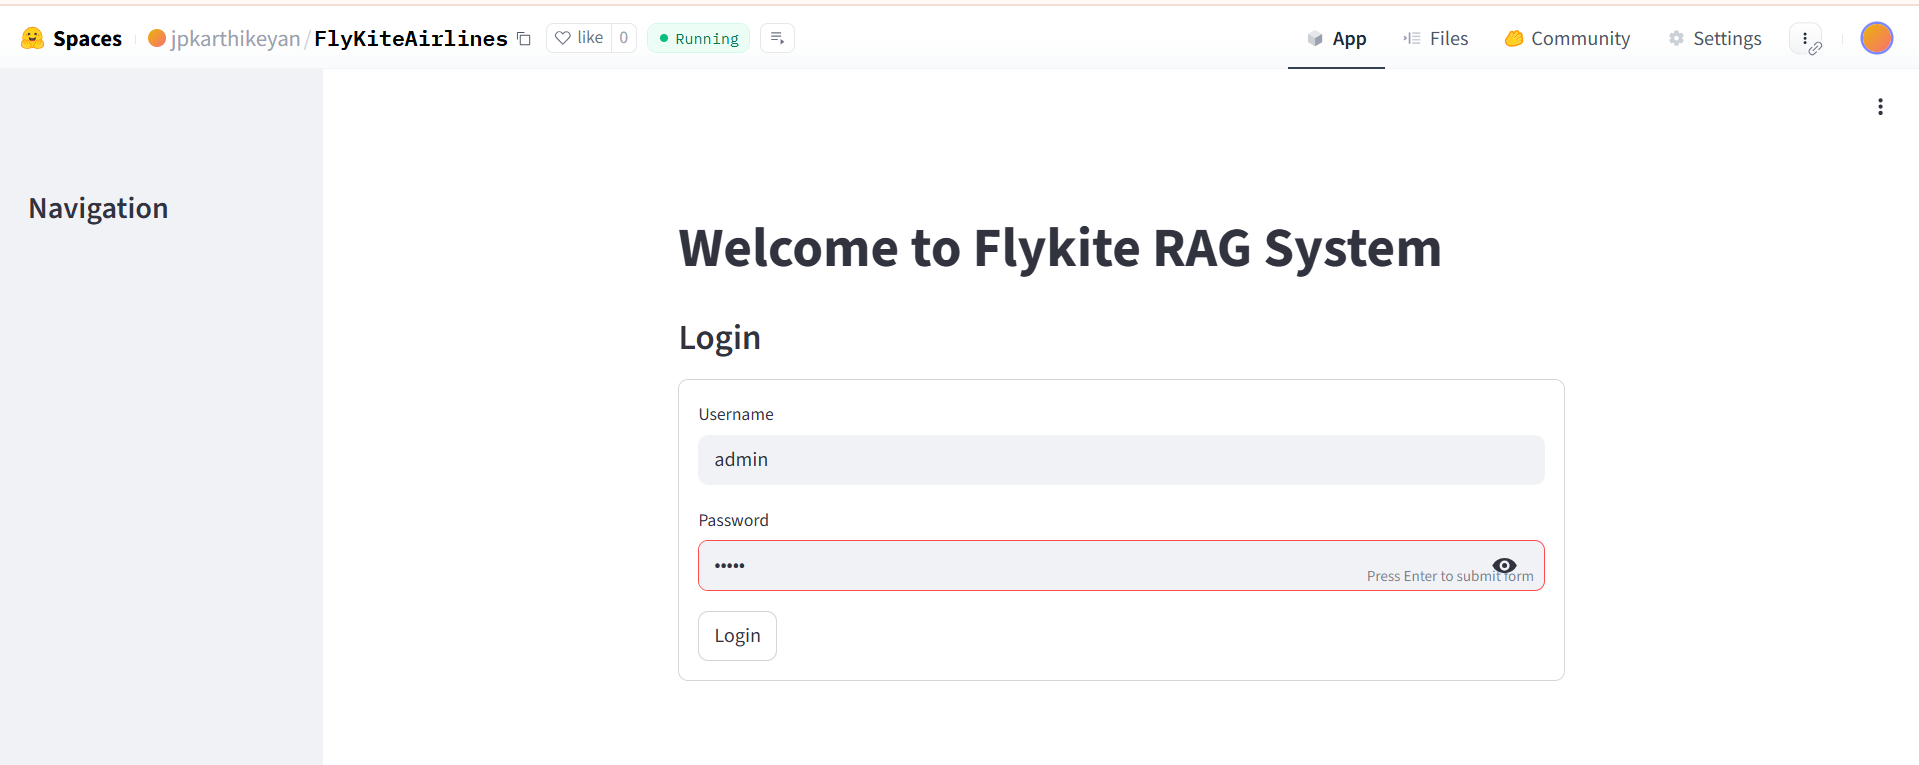

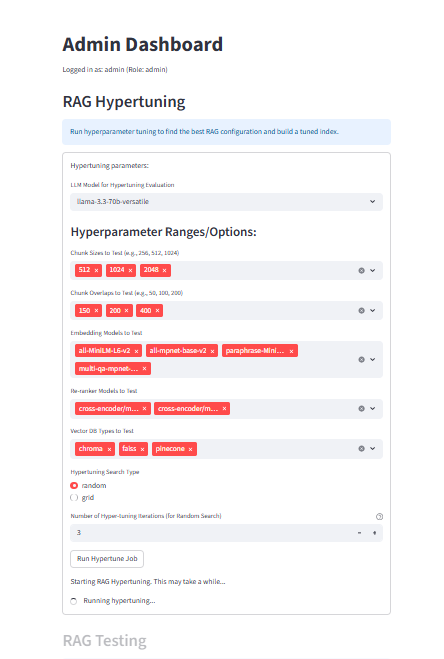

Hyper Tuning Result



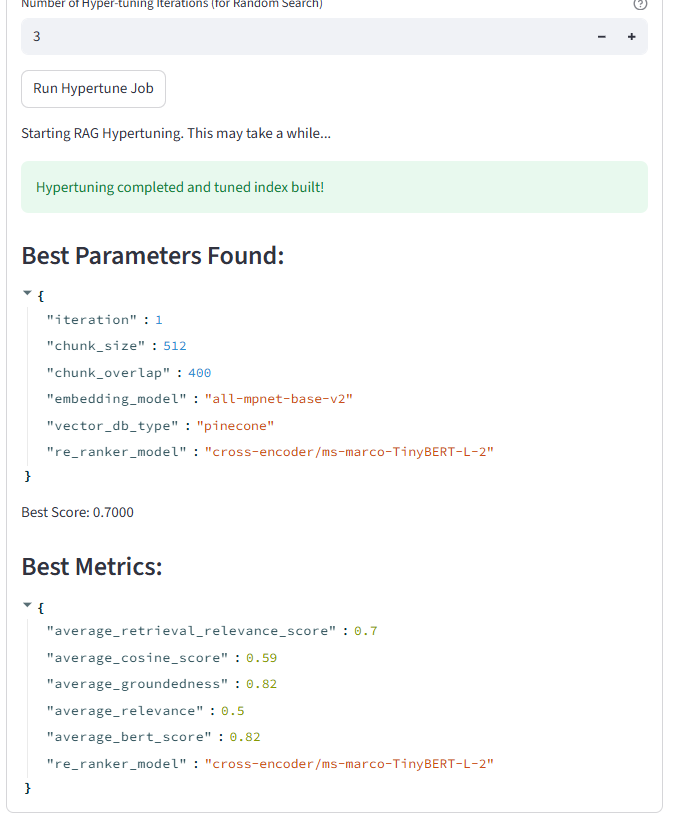

# Question 01: What are the effects on the benefits I receive if my probation is extended?


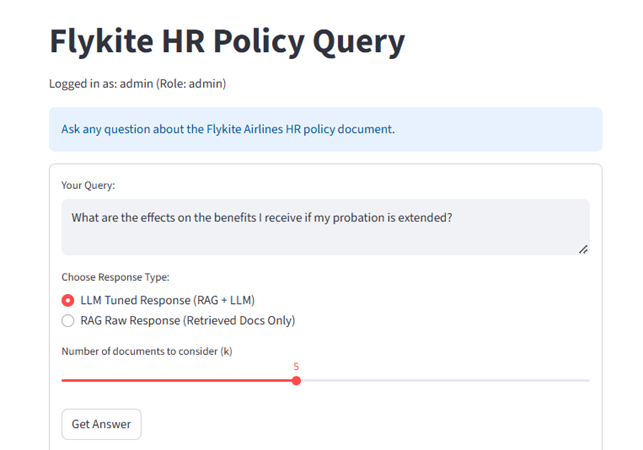





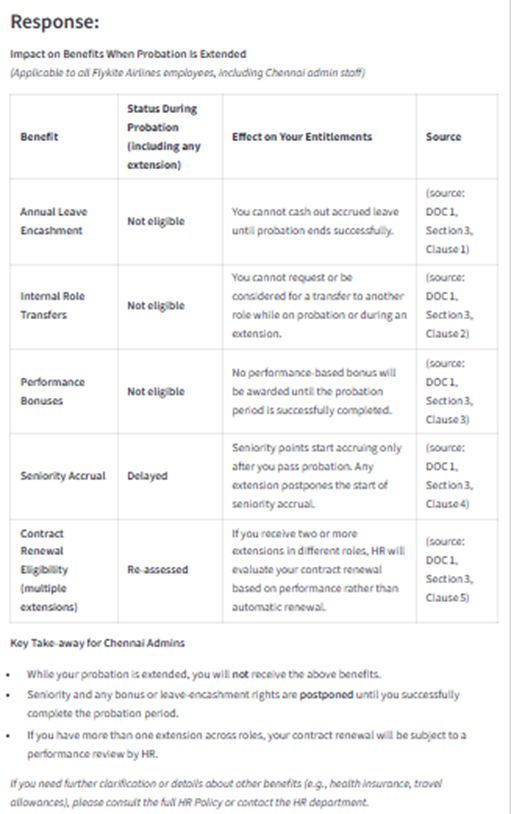




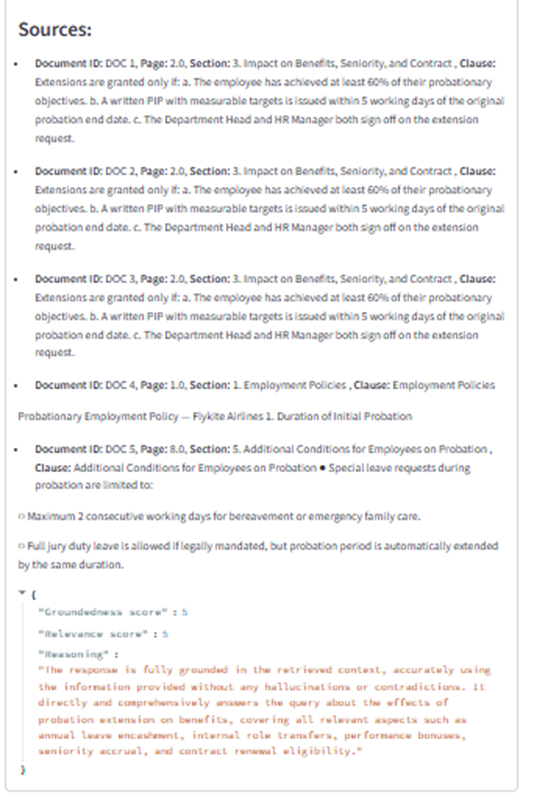

# Question 02: There has been a demise in my family last night, and I need to attend the last rites.How should I inform the office, and will I be granted leave?

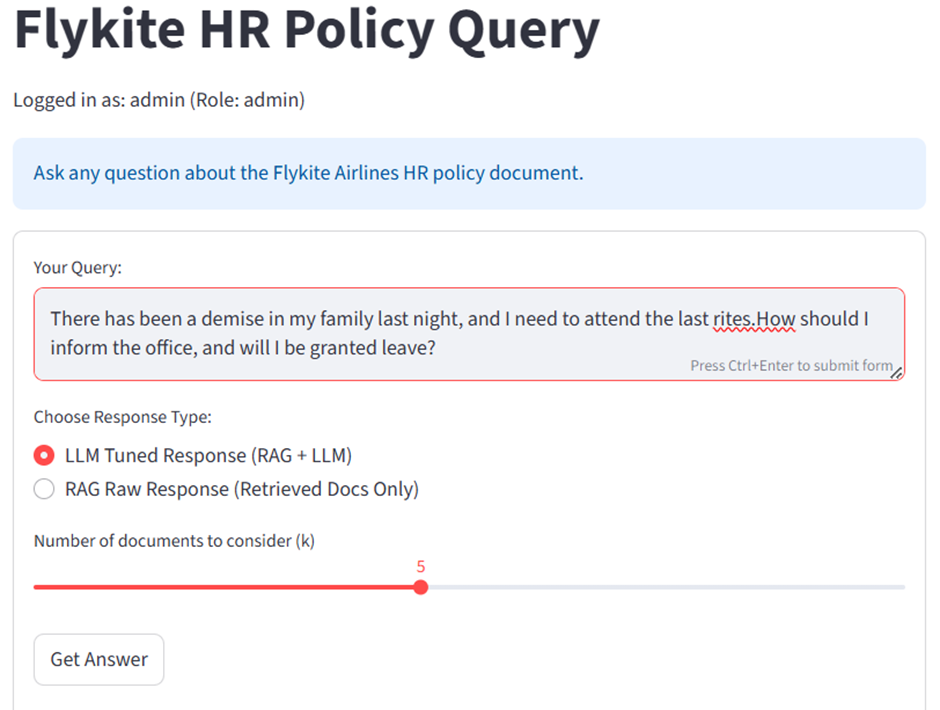



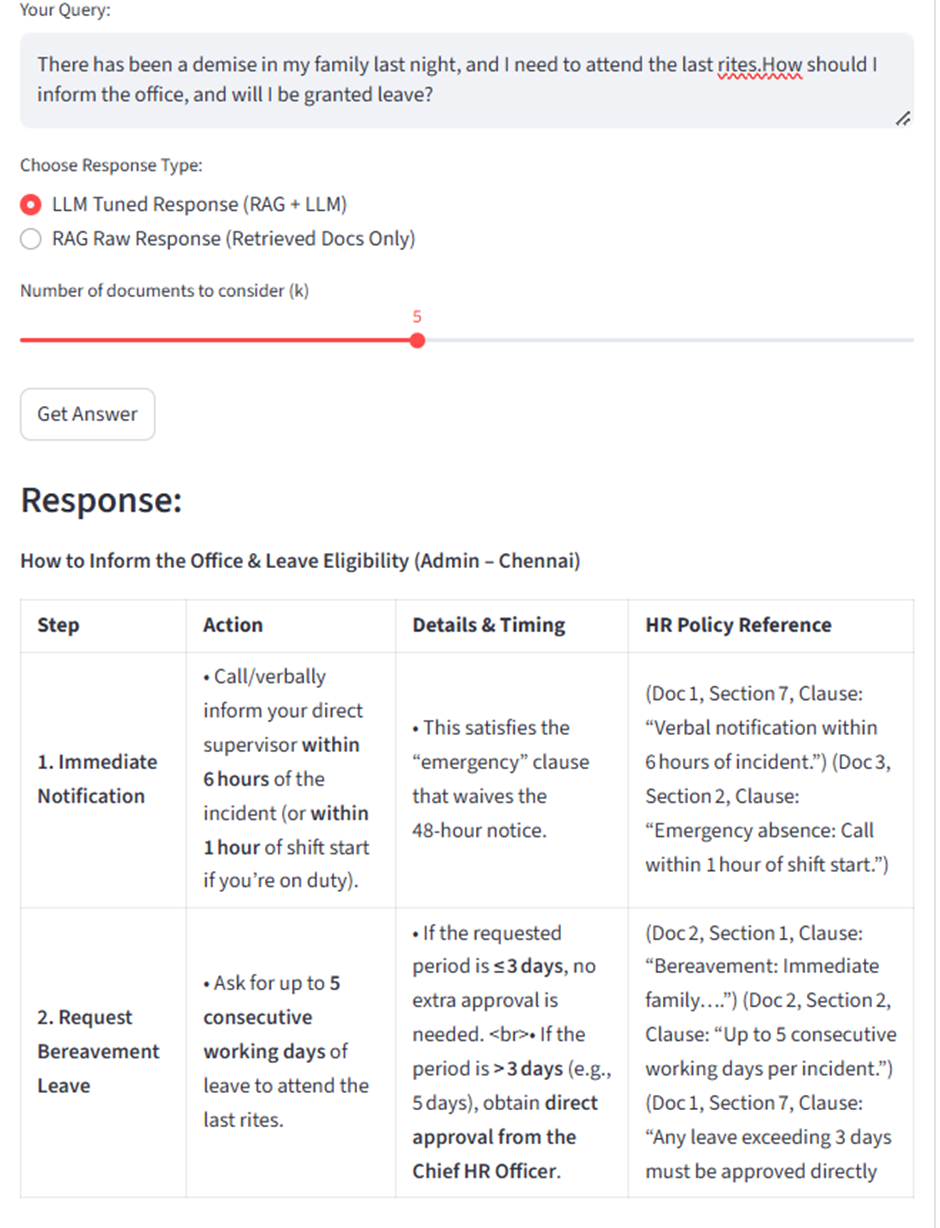






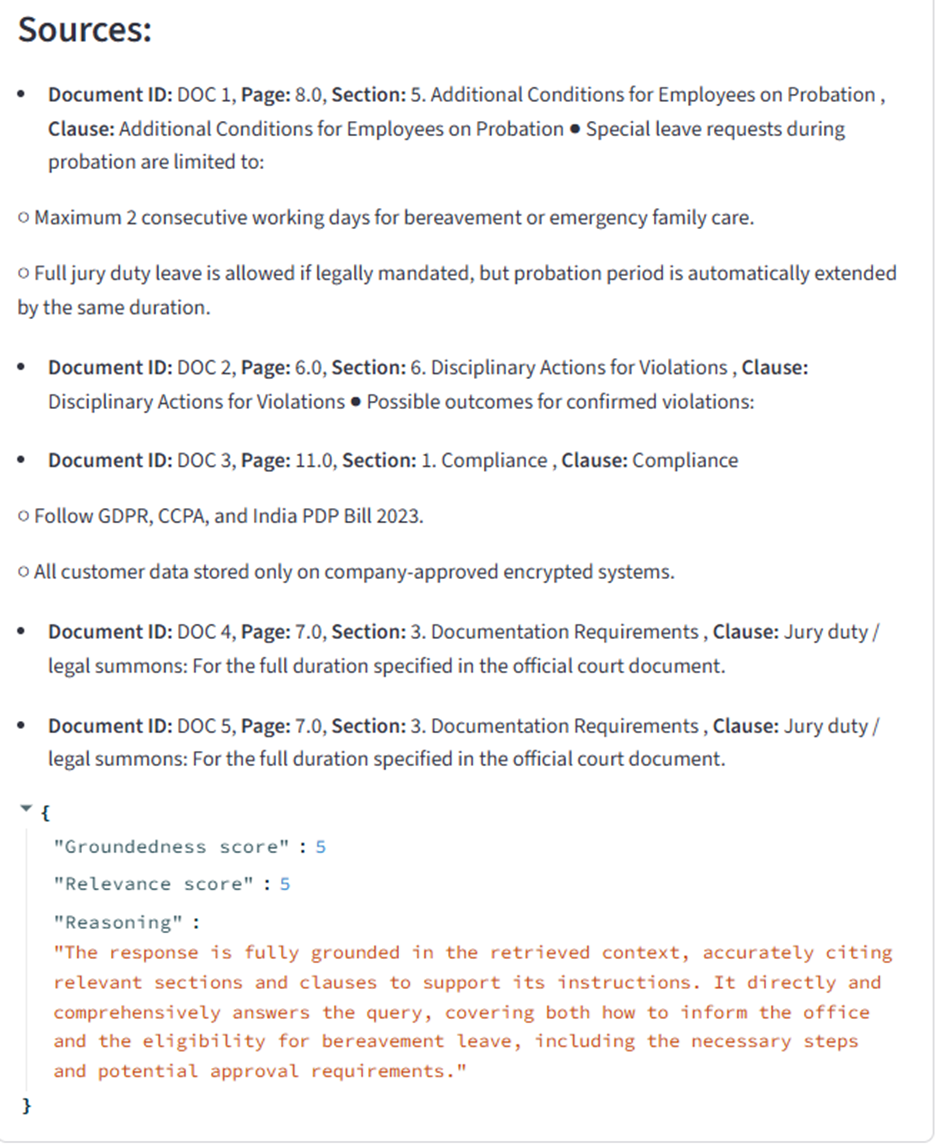

# Question 03: What should I do if I notice suspected harassment with my female colleague?


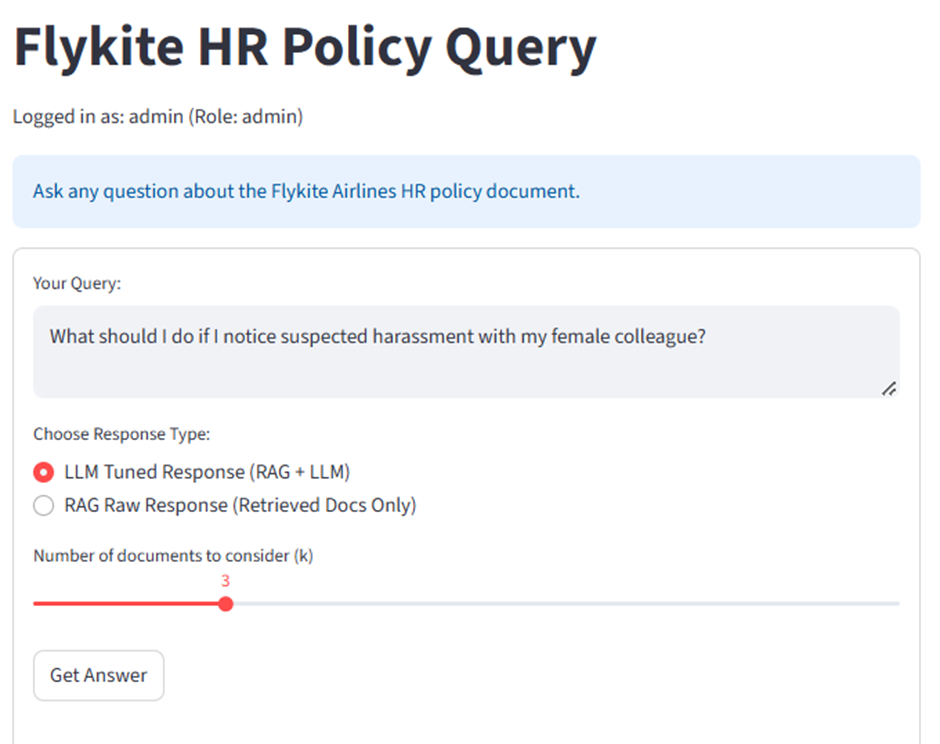



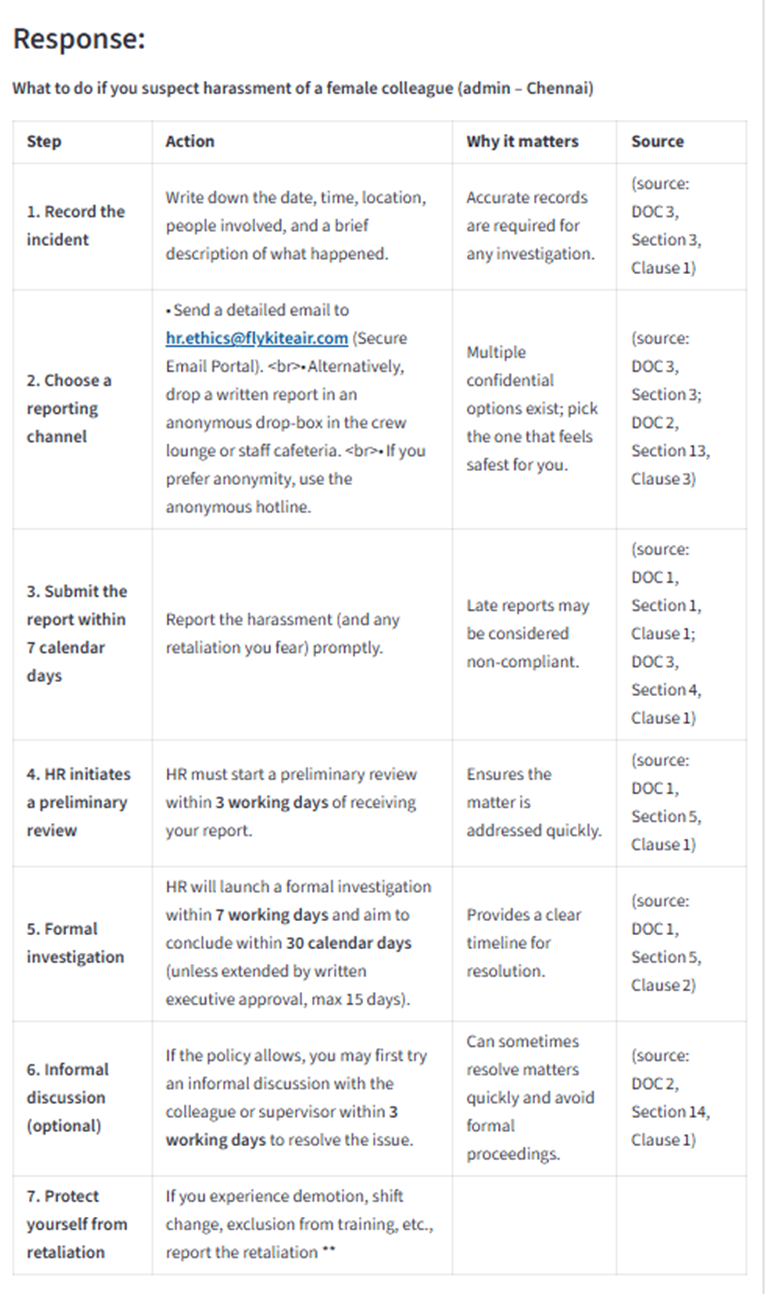


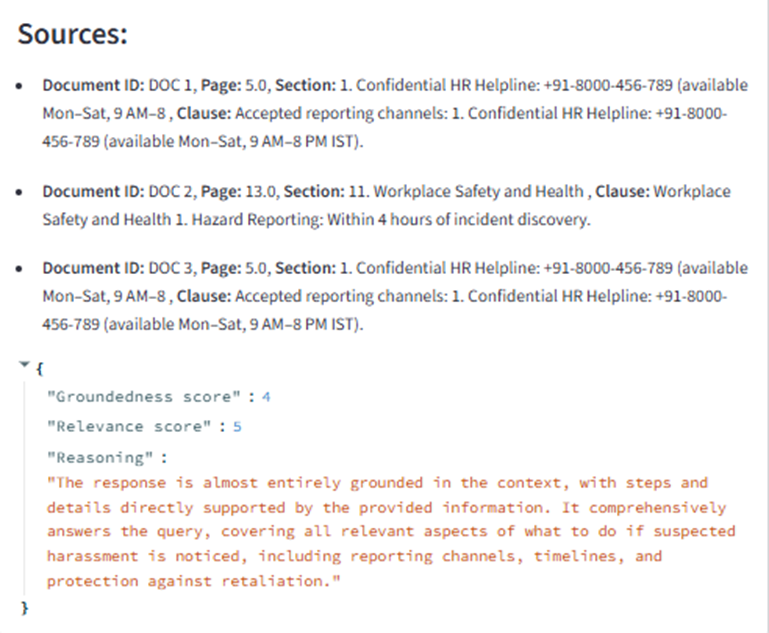



# ***Data Preparation for RAG***
- Load the data file provided
- Split the data using a text splitter with necessary attributes
- Load the embedding model
- Load the vector database
- Define the retriever with appropriate search method and k value
- Test the retriever by fetching relevant chunks of data as per the provided questions

In [1]:
!python main.py --job eval-hypertune

python3: can't open file '/content/main.py': [Errno 2] No such file or directory


## What are the effects on the benefits I receive if my probation is extended?

In [ ]:
!python main.py --job search --k 5 --query "What are the effects on the benefits I receive if my probation is extended? " --use-rag true --fine-tune

2025-10-24 18:30:09.199435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761330609.241146   22749 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761330609.254748   22749 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761330609.293953   22749 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761330609.294009   22749 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761330609.294019   22749 computation_placer.cc:177] computation placer alr

## Q2: There has been a demise in my family last night, and I need to attend the last rites.How should I inform the office, and will I be granted leave?

In [ ]:
!python main.py --job search --k 5 --query "There has been a demise in my family last night, and I need to attend the last rites.How should I inform the office, and will I be granted leave? " --use-rag true --fine-tune

2025-10-24 18:28:53.649789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761330533.688740   22479 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761330533.700964   22479 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761330533.730340   22479 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761330533.730401   22479 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761330533.730410   22479 computation_placer.cc:177] computation placer alr

## Q3: What should I do if I notice suspected harassment with my female colleague?

In [ ]:
!python main.py --job search --k 5 --query "What should I do if I notice suspected harassment with my female colleague?" --use-rag true --fine-tune

2025-10-24 18:27:51.724243: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761330471.768029   22173 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761330471.782932   22173 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761330471.814599   22173 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761330471.814658   22173 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761330471.814663   22173 computation_placer.cc:177] computation placer alr